In [1]:
import tbmodels
from yambopy import *
import matplotlib.pyplot as plt
from yambopy.lattice import car_red, red_car
import matplotlib.pylab as pylab
from pylab import rcParams
from matplotlib.ticker import MultipleLocator
import matplotlib.lines as mlines
# Set figure size and DPI globally
rcParams['figure.figsize'] = 6, 4  # 6 inches wide, 4 inches tall
rcParams['figure.dpi'] = 300  # 300 dots per inch

# Font sizes
rcParams['font.size'] = 20
rcParams['axes.titlesize'] = 20  # fontsize of the axes tit bels
rcParams['xtick.labelsize'] = 20  # fontsize of the tick labels
rcParams['ytick.labelsize'] = 20  # fontsize of the tick labels
rcParams['legend.fontsize'] = 16  # legend fontsize

# Line widths and marker sizes
rcParams['lines.linewidth'] = 2  # width of lines
rcParams['lines.markersize'] = 6  # size of markers

# Label, axis, and tick thickness
rcParams['axes.linewidth'] = 1.5  # axis line width
rcParams['xtick.major.width'] = 1.2  # width of the major tick lines
rcParams['ytick.major.width'] = 1.2  # width of the major tick lines

WORK_PATH='/Users/Reho0001/workQE/Projects/LiF/March2024'
YAMBO_TUT_PATH = f'/Users/Reho0001/workQE/Projects/LiF/yambo_tutorials/'
ry2ev=13.605703976

In [2]:
def get_kernel_value_bands_4D(self, excitons, bands_range):
    """
    Get value of kernel matrix elements as a function of (v, c, k, p)
    where v and c are valence and conduction bands, k and p are k-point indices.

    Args:
    excitons: YamboExcitonDB object containing exciton data and the lattice structure
    bands_range: Tuple (min_band, max_band) defining the range of band indices

    Returns:
    W: A 4D numpy array with dimensions corresponding to (v, c, k, p)
    """
    table = excitons.table
    nk = self.lattice.nkpoints
    kernel = self.kernel
    self.consistency_BSE_BSK(excitons)

    min_band, max_band = bands_range
    nbands = max_band

    # Initialize the 4D array for kernel values with dimensions covering the band range
    W = np.zeros((nbands, nbands, nk, nk), dtype=complex)

    # Iterate over all possible v, c bands within the specified range
    for iv_index, iv in enumerate(range(min_band, max_band + 1), start=0):
        for ic_index, ic in enumerate(range(min_band, max_band + 1), start=0):
            if iv not in table[:, 1] or ic not in table[:, 2]:
                continue

            t_v = np.where(table[:, 1] == iv)[0]
            t_c = np.where(table[:, 2] == ic)[0]
            t_vc = [t for t in t_v if t in t_c]
    
            for it1_subset, it2_subset in product(t_vc, repeat=2):
                ik = table[it1_subset][0]
                ip = table[it2_subset][0]
                print(ik,ip)
                # Store in 4D array, adjusting indices for zero-based Python indexing
                W[iv-1, ic-1, ik - 1, ip - 1] = kernel[it1_subset, it2_subset]

    return W

In [3]:
# Istance of useful classes
savedb_k = YamboSaveDB.from_db_file(f'{YAMBO_TUT_PATH}//May2024/Optics/4x4x4/full/SAVE')
lat_k = YamboLatticeDB.from_db_file(f'{YAMBO_TUT_PATH}//May2024/Optics/4x4x4/full/SAVE/ns.db1')
savedb_q = YamboSaveDB.from_db_file(f'{YAMBO_TUT_PATH}//May2024/Optics/2x2x2/full/SAVE')
lat_q = YamboLatticeDB.from_db_file(f'{YAMBO_TUT_PATH}//May2024/Optics/2x2x2/full/SAVE/ns.db1')

8 kpoints expanded to 64
3 kpoints expanded to 8


In [4]:
# Create instance of real space Hamiltonian in MLWF basis
hrk=HR(f'{YAMBO_TUT_PATH}/May2024/nscf-wannier-4x4x4/LiF')
hrq = HR(f'{YAMBO_TUT_PATH}/May2024/nscf-wannier-2x2x2/LiF')
#hrqexc=HR(f'{YAMBO_TUT_PATH}/unshifted-grid/nscf-wannier-kgrid/exc/LiF_exc')

Time for HR.__init__() : 4.607483863830566 , read : 4.606191873550415 , headstring 0.0012919902801513672
Time for HR.__init__() : 3.9132039546966553 , read : 3.912875175476074 , headstring 0.0003287792205810547


In [5]:
# Create a grid
nnkp_kgrid = NNKP_Grids(f'{YAMBO_TUT_PATH}/May2024/nscf-wannier-4x4x4//LiF', lat_k, yambo_grid=True)

Time for NNKP.__init__() : 0.0057408809661865234


In [6]:
nnkp_qgrid = NNKP_Grids(f'{YAMBO_TUT_PATH}/May2024/nscf-wannier-2x2x2//LiF', lat_q, yambo_grid=True)

Time for NNKP.__init__() : 0.0023679733276367188


In [26]:
nnkp_kgrid.k

array([[ 0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.25],
       [-0.25, -0.25, -0.25],
       [ 0.  ,  0.25,  0.  ],
       [ 0.25,  0.  ,  0.  ],
       [ 0.  ,  0.  , -0.25],
       [ 0.25,  0.25,  0.25],
       [ 0.  , -0.25,  0.  ],
       [-0.25,  0.  ,  0.  ],
       [ 0.  ,  0.  , -0.5 ],
       [ 0.5 ,  0.5 ,  0.5 ],
       [ 0.  , -0.5 ,  0.  ],
       [-0.5 ,  0.  ,  0.  ],
       [ 0.  ,  0.25,  0.25],
       [ 0.  , -0.25, -0.25],
       [-0.25,  0.  , -0.25],
       [ 0.25,  0.  ,  0.25],
       [ 0.25,  0.25,  0.  ],
       [-0.25, -0.25,  0.  ],
       [ 0.  ,  0.25, -0.5 ],
       [-0.25,  0.5 ,  0.5 ],
       [ 0.  , -0.5 ,  0.25],
       [ 0.25, -0.25, -0.25],
       [-0.25,  0.  ,  0.5 ],
       [-0.5 ,  0.25, -0.5 ],
       [ 0.25, -0.25,  0.25],
       [ 0.5 ,  0.  , -0.25],
       [ 0.  ,  0.5 , -0.25],
       [ 0.  , -0.25,  0.5 ],
       [-0.25,  0.25,  0.25],
       [ 0.25, -0.5 , -0.5 ],
       [ 0.25,  0.25, -0.25],
       [ 0.5 , -0.25,  0.  ],
       [-0

In [25]:
h2p.H2P

array([[ 0. ,  0. ,  0. ],
       [ 0. ,  0. , -0.5],
       [ 0.5,  0.5,  0.5],
       [ 0. , -0.5,  0. ],
       [-0.5,  0. ,  0. ],
       [ 0. , -0.5, -0.5],
       [ 0.5,  0. ,  0.5],
       [-0.5, -0.5,  0. ]])

In [7]:
# We need all these auxiliary grids for wannierization of the BSE Hamiltonian
nnkp_kgrid.get_kmq_grid(nnkp_qgrid)
nnkp_kgrid.get_qpb_grid(nnkp_qgrid)
nnkp_qgrid.get_qpb_grid(nnkp_qgrid)
nnkp_kgrid.get_kpbover2_grid(nnkp_qgrid)
nnkp_kgrid.get_kmqmbover2_grid(nnkp_qgrid)

In [8]:
model = TBMODEL.from_wannier_files(
    hr_file=f'{YAMBO_TUT_PATH}/May2024/nscf-wannier-4x4x4/LiF_hr.dat',
    wsvec_file=f'{YAMBO_TUT_PATH}/May2024/nscf-wannier-4x4x4/LiF_wsvec.dat',
    #xyz_file=f'{WORK_PATH}/w90files/hBN_centres.xyz',
    win_file=f'{YAMBO_TUT_PATH}/May2024/nscf-wannier-4x4x4/LiF.win'
)
model.set_mpgrid(nnkp_kgrid)

In [9]:
fermie = 1.0
model.solve_ham_from_hr(lat_k, hrk, fermie=fermie  )

Diagonalization took 0.023 s


In [10]:
hlm = model.get_hlm(lat_k.lat, hrk)

Diagonalization took 0.020 s


(-12.0, 20.0)

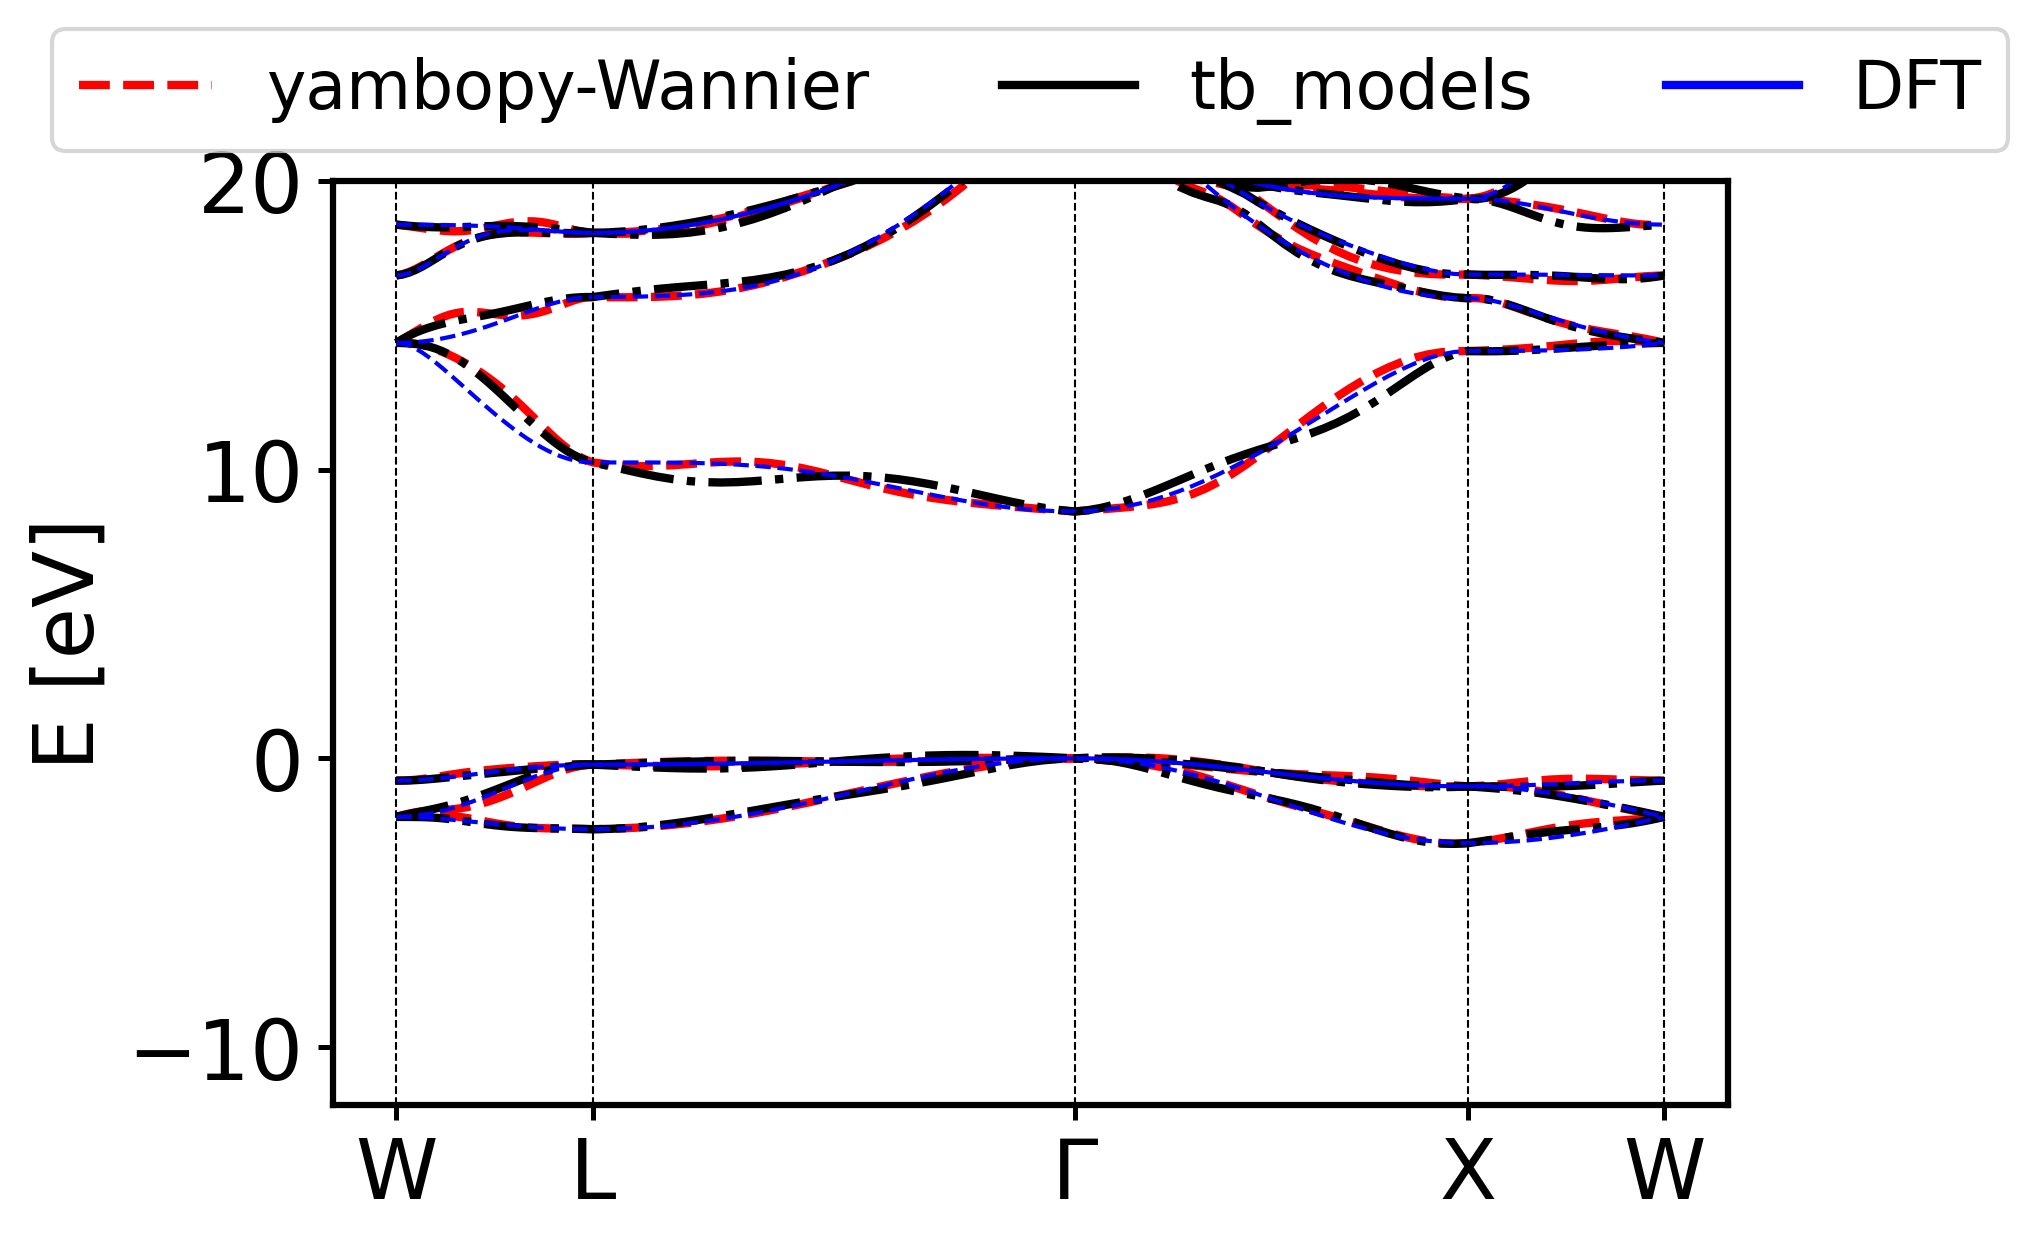

In [9]:
# Define path in reduced coordinates using Class Path
npoints = 30
path_kpoints = Path([[[  0.5,  0.250,  0.750],'W'],
                     [[0.5,0.5,  0.5],'L'],
              #[[  0.375,  0.375,  0.750],'K'],    
              [[  0.0,  0.0,  0.0],'$\Gamma$'],
              #[[  0.625,  0.250,  0.625],'U'],
              [[  0.5,  0.0,  0.5],'X'],
              [[  0.5,  0.250,  0.750],'W']],[npoints,npoints,npoints,npoints] )
              #[[  0.750,  0.250,  0.5],'W2'],
              
kpoints_red = path_kpoints.get_klist()[:,0:3]
kpoints_car = red_car(kpoints_red, lat_k.rlat)
kdistance = path_kpoints.distances
kpoints = path_kpoints.kpoints

H_atk = model.solve_ham_from_hr(lat_k, hrk , fermie = 1.0)
#H_atk = model.solve_ham(kpoints_red)#, fermie = 3.0)
E_k_tb= np.array(model.eigenval(kpoints_red))
E_k= np.array(model.get_eigenval(kpoints_red,from_hr=True))
tb_ebands = YambopyBandStructure(E_k_tb,kpoints_red,kpath=path_kpoints)
tb_kdist = tb_ebands.distances
#E_k= np.array(model.get_eigenval(kpoints_car))
nbands = E_k.shape[1]
nkpoints = E_k.shape[0]
# Class PwXML. QE database reading
fig, ax = plt.subplots()
xml = PwXML(prefix='LiF',path=f'{YAMBO_TUT_PATH}/May2024/bands/')#,qe_version='6.7')
kpoints_dists = calculate_distances(xml.kpoints[:xml.nkpoints])
#xml.plot_eigen_ax(ax, path_kpoints, y_offset=-1., lw =1, ylim=(-4,17))
#for ib in range(xml.nbands):
#  ax.plot(tb_kdist, xml.eigen1[:,ib], c='red',lw=1.0)
for ib in range(nbands):
  ax.plot(tb_kdist, E_k[:,ib]-np.max(E_k[:,2]), c='red', ls = '--', lw=2.0)
for ib in range(nbands):
  ax.plot(tb_kdist, E_k_tb[:,ib]-np.max(E_k_tb[:,2]), c='black', ls = '-.', lw=2.0)  
for ib in range(xml.nbands):
  ax.plot(tb_kdist, xml.eigen1[:,ib], c='blue',ls='--',lw=1.0)  
#ax.scatter(wann_bands[:,0]/np.max(wann_bands[:,0])*np.max(tb_kdist), wann_bands[:,1], c='black',s=0.5)
tb_eb = tb_ebands.add_kpath_labels(ax)
legend_entries = [
    mlines.Line2D([], [], color='red', ls ='--', label='yambopy-Wannier'),
    mlines.Line2D([], [], color='black', label='tb_models'),
    mlines.Line2D([], [], color='blue', label='DFT'),
]

# Add custom legend outside the loop
ax.legend(handles=legend_entries, loc='upper center', bbox_to_anchor=(0.5, 1.20), ncol=3)
# ax.plot(qe_en, qe_bands)
ax.set_ylabel('E [eV]')
ax.set_ylim(-12,20)
#plt.savefig(f'{YAMBO_TUT_PATH}/unshifted-grid/yambopyvstbmodels_q.png',bbox_inches='tight')


In [34]:
xml.eigen1

array([[-39.68253732, -18.7645361 ,  -2.02637359, ...,  16.72182793,
         18.48284269,  26.5751119 ],
       [-39.68258193, -18.76519892,  -2.0280087 , ...,  16.74288264,
         18.48263628,  26.56971209],
       [-39.68271528, -18.76717931,  -2.0328674 , ...,  16.80320282,
         18.48201152,  26.55407009],
       ...,
       [-39.68254875, -18.76424496,  -2.12761592, ...,  16.72244495,
         18.49174032,  25.82880421],
       [-39.68254018, -18.76446311,  -2.07725598, ...,  16.72198333,
         18.48507131,  26.19859625],
       [-39.68253732, -18.7645361 ,  -2.02637359, ...,  16.72182793,
         18.48284269,  26.5751119 ]])

In [29]:
savedb_k.nkpoints

8

In [115]:
savedb_k.expand_kpts()

(array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-3.24528823e-02,  3.24528823e-02, -3.24528823e-02],
        [ 3.24528823e-02, -3.24528823e-02, -3.24528823e-02],
        [ 3.24528823e-02,  3.24528823e-02,  3.24528823e-02],
        [-3.24528823e-02, -3.24528823e-02,  3.24528823e-02],
        [ 3.24528823e-02, -3.24528823e-02,  3.24528823e-02],
        [-3.24528823e-02,  3.24528823e-02,  3.24528823e-02],
        [-3.24528823e-02, -3.24528823e-02, -3.24528823e-02],
        [ 3.24528823e-02,  3.24528823e-02, -3.24528823e-02],
        [ 6.49057646e-02, -6.49057646e-02,  6.49057646e-02],
        [-6.49057646e-02,  6.49057646e-02,  6.49057646e-02],
        [-6.49057646e-02, -6.49057646e-02, -6.49057646e-02],
        [ 6.49057646e-02,  6.49057646e-02, -6.49057646e-02],
        [ 7.33404209e-19,  6.49057646e-02,  7.33404209e-19],
        [-7.33404209e-19, -6.49057646e-02, -7.33404209e-19],
        [ 6.49057646e-02,  7.33404209e-19, -7.33404209e-19],
        [-6.49057646e-02

In [10]:
def check_eigenvalues(model, savedb_k, ib,offset_nv=0):
    test_a = np.zeros(shape=(model.nk), dtype=complex)
    full_kpoints, kpoints_indexes, symmetry_indexes = savedb_k.expand_kpts()
    for ik, k in enumerate(nnkp_kgrid.k):
        test_a[ik] = model.eigv[ik,ib-offset_nv]-savedb_k.eigenvalues[0,kpoints_indexes[ik],ib]
    return test_a

In [42]:
savedb_k.eigenvalues.shape

(1, 8, 50)

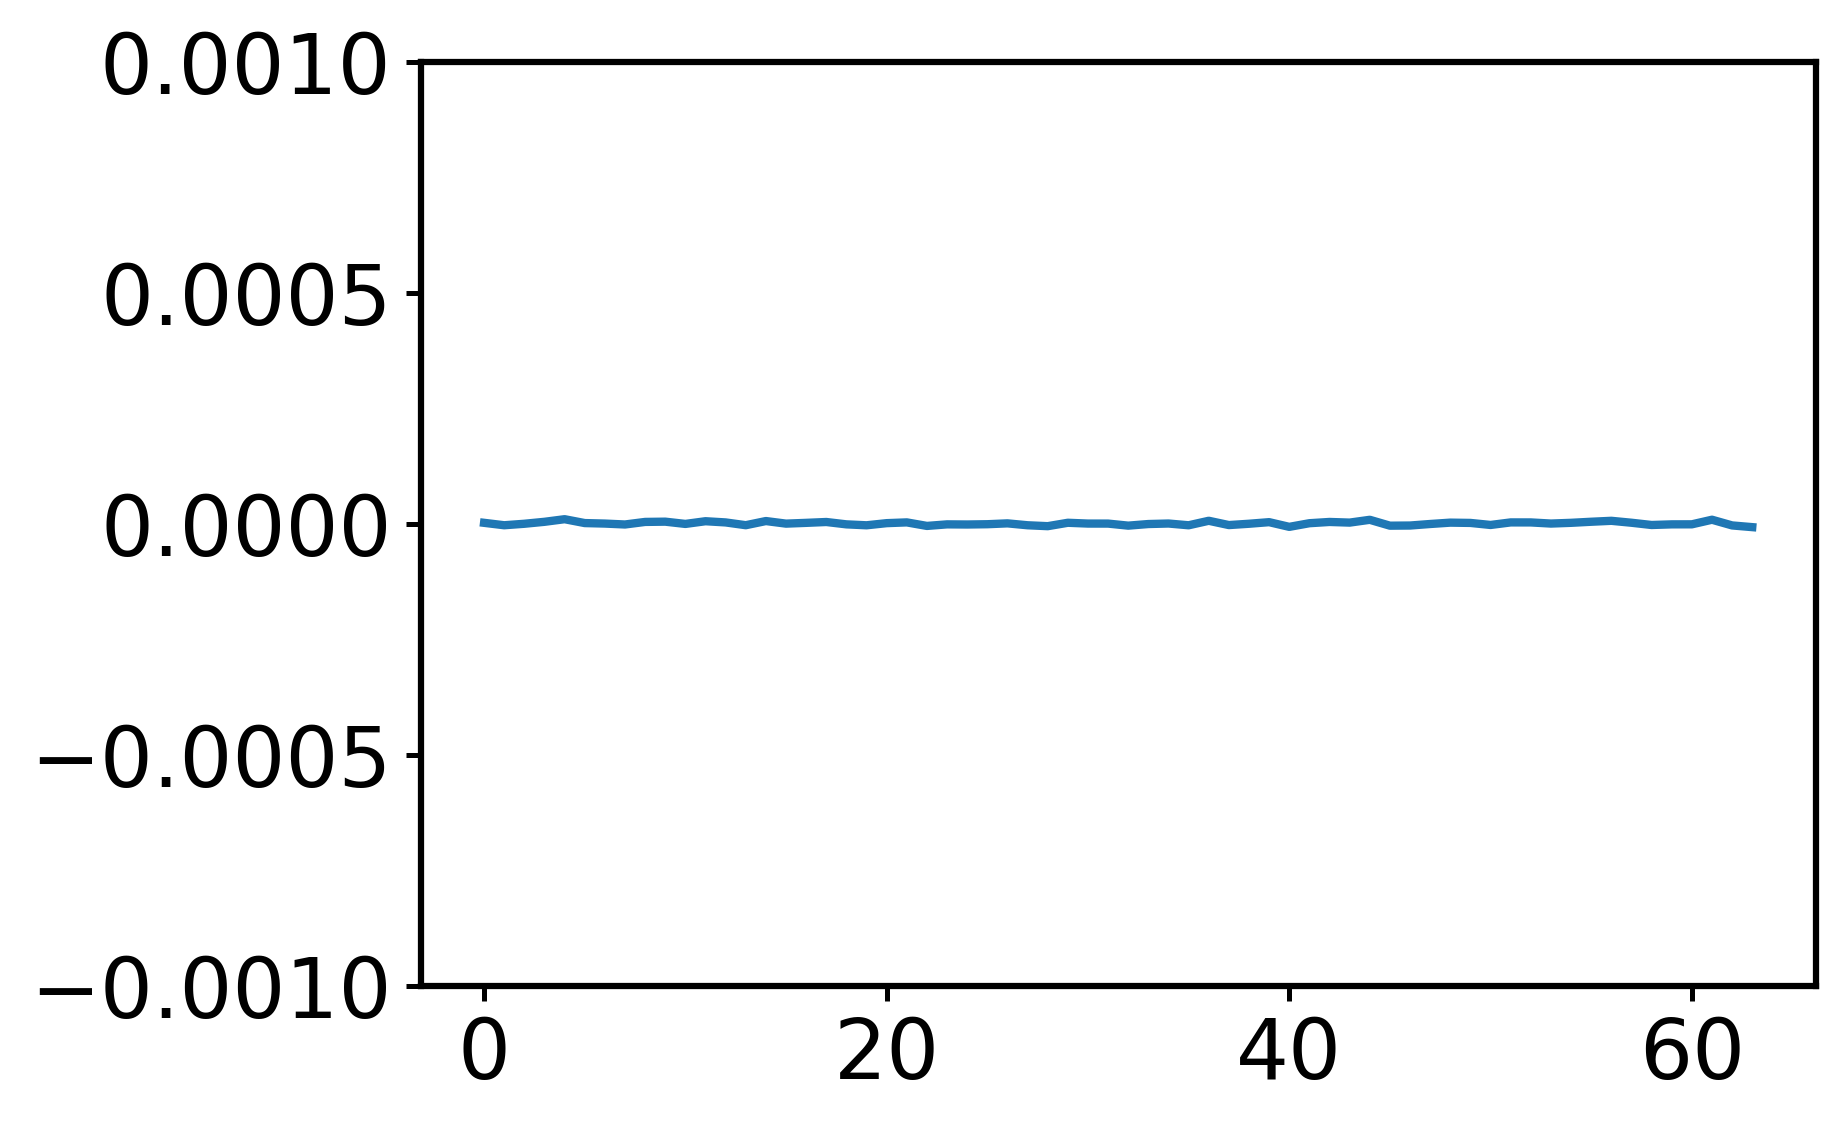

In [16]:
fig,ax = plt.subplots()
x = np.arange(0,model.nk)
ax.set_ylim([-0.001,0.001])
test_a = check_eigenvalues(model, savedb_k, ib=4)
ax.plot(x, test_a )

In [11]:
model.eigv.shape

(64, 13)

In [12]:
model.eigv[:,5] = model.eigv[:,5] + 5.8
model.eigv[:,6] = model.eigv[:,6] + 5.8
model.eigv[:,7] = model.eigv[:,7] + 5.8
model.eigv[:,8] = model.eigv[:,8] + 5.8
model.eigv[:,9] = model.eigv[:,9] + 5.8
model.eigv[:,10] = model.eigv[:,10] + 5.8
model.eigv[:,11] = model.eigv[:,11] + 5.8
model.eigv[:,12] = model.eigv[:,12] + 5.8


In [11]:
yexck = YamboExcitonDB.from_db_file(lat_k,filename=f'{YAMBO_TUT_PATH}/May2024/Optics/4x4x4/full/1-1bands/06_BSE_triplet_noscissor/ndb.BS_diago_Q1')
bsekernelk = YamboBSEKernelDB.from_db_file(lattice=lat_k, folder=f'{YAMBO_TUT_PATH}/May2024/Optics/4x4x4/full/1-1bands/06_BSE_triplet_noscissor/',Qpt=1)
yexcq = YamboExcitonDB.from_db_file(lat_k,filename=f'{YAMBO_TUT_PATH}///May2024/Optics/4x4x4/full/1-1bands/06_BSE_triplet_noscissor/ndb.BS_diago_Q1')
bsekernelq = YamboBSEKernelDB.from_db_file(lattice=lat_k, folder=f'{YAMBO_TUT_PATH}//May2024/Optics/4x4x4/full/1-1bands/06_BSE_triplet_noscissor',)

In [41]:
import numpy as np

# Example eigenvalues and eigenvectors
eigenvalues = yexck.eigenvalues  # Replace with your actual eigenvalues
eigenvectors = yexck.eigenvectors # Replace with your actual eigenvectors

# Step 1: Create the matrix of eigenvectors
V = eigenvectors

# Step 2: Create the diagonal matrix of eigenvalues
Lambda = np.diag(eigenvalues)

# Step 3: Compute the inverse of the eigenvector matrix
V_inv = np.linalg.inv(V)

# Step 4: Reconstruct the original matrix
A_reconstructed = V @ Lambda @ V_inv

# Output the results
print("Eigenvectors (V):")
print(V)

print("Diagonal matrix of eigenvalues (Lambda):")
print(Lambda)

print("Inverse of eigenvector matrix (V_inv):")
print(V_inv)

print("Reconstructed matrix (A):")
print(A_reconstructed)


Eigenvectors (V):
[[-2.47371330e-01+3.32384759e-01j  1.29749048e-01-4.56011032e-02j
  -2.09251876e-01+5.21292470e-01j ... -9.83266840e-04+5.55998732e-05j
  -3.37480008e-03+3.45684530e-04j -2.90942359e-03+0.00000000e+00j]
 [ 4.63879120e-01-5.11203531e-02j -4.66307797e-02+4.28071767e-01j
  -2.49908592e-01+2.01445350e-01j ...  2.99817880e-03+9.03742524e-04j
  -1.04322416e-04-5.51074208e-04j -1.82922747e-03+0.00000000e+00j]
 [ 3.35554586e-01-6.48307961e-02j  1.69664496e-01-5.22758158e-01j
  -2.95977014e-01-6.19453187e-03j ... -9.56720906e-04+4.48874528e-04j
   4.84121525e-05+2.11981898e-05j  1.57676016e-04+0.00000000e+00j]
 ...
 [ 8.07348203e-05-3.27353036e-05j  1.95661586e-05-9.78502182e-05j
  -5.92245311e-05+4.24141944e-06j ...  1.17022223e-05+1.65813518e-07j
   1.30604021e-04+5.02696062e-07j  1.31048788e-04+0.00000000e+00j]
 [-8.94400666e-05+5.45784449e-05j  1.09743041e-05-1.00128402e-04j
   2.30043211e-08-3.67643681e-06j ... -1.49578926e-05-4.79049927e-07j
   1.40665055e-05+1.50584533e

In [14]:
sort_kernel= np.sort(bsekernelk.kernel.flatten()*ha2ev)

In [28]:
np.sort(np.diag(h2p.H2P[0,:]))

array([ 6.90931874+5.18758804e-05j,  6.90932348+5.18779875e-05j,
        6.90932703+5.18780119e-05j,  8.25874874+5.19335007e-05j,
        8.2587501 +5.19344669e-05j,  8.25875178+5.19350235e-05j,
        8.2587531 +5.19292493e-05j,  8.25875502+5.19348163e-05j,
        8.25875512+5.19312241e-05j,  8.25875882+5.19326648e-05j,
        8.25876016+5.19327435e-05j,  8.25876024+5.19316610e-05j,
        8.25876088+5.19339304e-05j,  8.25876155+5.19329500e-05j,
        8.25876217+5.19332935e-05j,  8.25876339+5.19322044e-05j,
        8.25876436+5.19333844e-05j,  8.25876721+5.19322128e-05j,
        8.25877028+5.19297012e-05j,  8.82744353+5.17434258e-05j,
        8.82744816+5.17365882e-05j,  8.82744938+5.17453317e-05j,
        8.82745033+5.17443880e-05j,  8.82745043+5.17442810e-05j,
        8.82745502+5.17478485e-05j,  8.82745564+5.17411241e-05j,
        8.82745909+5.17430076e-05j,  9.4875179 +5.18998017e-05j,
        9.48751904+5.18976332e-05j,  9.48751956+5.18998017e-05j,
        9.48752026+5.1896

In [15]:
sort_kernel[170:250]

array([-1.63893578-5.19196307e-05j, -1.63893578-5.19196307e-05j,
       -1.63882103-5.18997774e-05j, -1.63882103-5.18997774e-05j,
       -1.63882103-5.18976089e-05j, -1.63882103-5.18976089e-05j,
       -1.63882103-5.18968805e-05j, -1.63882103-5.18968804e-05j,
       -1.63882103-5.19001992e-05j, -1.63882103-5.19001992e-05j,
       -1.63641683-5.17434016e-05j, -1.63641683-5.17453075e-05j,
       -1.63641683-5.17429834e-05j, -1.63641683-5.17410999e-05j,
       -1.63641683-5.17443637e-05j, -1.63641683-5.17442568e-05j,
       -1.63641682-5.17365640e-05j, -1.63641682-5.17478242e-05j,
       -1.63018203-5.17310147e-05j, -1.63018203-5.17265586e-05j,
       -1.63018202-5.17268174e-05j, -1.63018202-5.17306294e-05j,
       -0.16932661+4.59883550e-02j, -0.16932661+4.59883550e-02j,
       -0.16932661+4.59883550e-02j, -0.16932661+4.59883550e-02j,
       -0.16932661+4.59883550e-02j, -0.16932661+4.59883550e-02j,
       -0.16932661+4.59883550e-02j, -0.16932661+4.59883550e-02j,
       -0.16932661+4.5988

In [17]:
import pandas as pd
from IPython.display import display

# Convert to DataFrame for a nicer tabular display (only display a small part to avoid overload)
df = pd.DataFrame(bsekernelk.kernel*ha2ev)  # adjust slice for larger/smaller preview
display(df)


,0,1,2,3,4,5,6,7,8,9,...,182,183,184,185,186,187,188,189,190,191
0,-1.639538e+00+5.187799e- 05j,-1.354583e-10-1.471120e- 10j,1.570966e-11-1.242435e- 09j,-0.091821-0.008311j,-0.001476+0.012728j,0.143935-0.047060j,-0.050638+0.042643j,0.091821+0.008311j,0.001476-0.012728j,0.050638-0.042643j,...,6.095002e-04-1.860973e- 03j,-9.468269e-04+1.735215e- 03j,9.300784e-04-1.256382e- 03j,-8.665915e-04+3.650232e- 04j,0.000054-0.001198j,-0.000737+0.001007j,0.002638-0.001090j,-0.001956+0.001281j,-0.001029+0.001141j,-0.000278+0.001352j
1,-1.354583e-10-1.471120e- 10j,-1.639538e+00+5.187796e- 05j,-1.491300e-09-1.425801e- 09j,-0.035152-0.011707j,-0.029672+0.139173j,0.006088-0.026681j,0.058737-0.100784j,0.035152+0.011707j,0.029672-0.139173j,-0.058737+0.100784j,...,-5.688150e-04+4.986804e- 04j,1.458823e-04-1.452133e- 04j,-2.719199e-04-2.392556e- 03j,-2.779030e-04+2.258735e- 03j,-0.001110-0.000389j,0.000339+0.001152j,0.000603+0.001799j,0.000169-0.002563j,0.000985-0.000120j,0.000433+0.001199j
2,1.570966e-11-1.242435e- 09j,-1.491300e-09-1.425801e- 09j,-1.639538e+00+5.187586e- 05j,0.112016-0.067554j,-0.029891+0.075345j,-0.001335-0.057458j,-0.080790+0.049668j,-0.112016+0.067554j,0.029891-0.075345j,0.080790-0.049668j,...,5.531815e-04-2.186064e- 03j,-2.739484e-04+2.338152e- 03j,-1.015518e-03-4.677004e- 04j,1.095287e-03-1.492929e- 03j,0.001688-0.002705j,-0.001115+0.002957j,-0.000901+0.000651j,0.000328-0.000903j,-0.001380+0.002781j,-0.001321+0.002777j
3,-9.182051e-02-8.310734e- 03j,-3.515241e-02-1.170712e- 02j,1.120160e-01-6.755419e- 02j,-1.638821+0.000052j,0.011027-0.000000j,0.011027-0.000000j,0.011027-0.000000j,0.040911-0.000001j,-0.046771+0.000001j,-0.046771+0.000001j,...,-2.525587e-03+4.879288e- 03j,-1.074028e-02+1.677555e- 02j,-1.074028e-02+1.677555e- 02j,-2.525587e-03+4.879288e- 03j,0.013646-0.004757j,0.009716+0.000049j,0.000668-0.002950j,0.016738-0.003732j,-0.016738+0.003732j,0.000668-0.002950j
4,-1.475876e-03+1.272803e- 02j,-2.967193e-02+1.391727e- 01j,-2.989088e-02+7.534497e- 02j,0.011027-0.000000j,-1.638821+0.000052j,0.011027-0.000000j,0.011027-0.000000j,-0.046771+0.000001j,0.040911-0.000001j,-0.046771+0.000001j,...,-1.074028e-02+1.677555e- 02j,-2.525587e-03+4.879288e- 03j,-1.074028e-02+1.677555e- 02j,-2.525587e-03+4.879288e- 03j,0.009716+0.000049j,0.013646-0.004757j,0.016738-0.003732j,0.000668-0.002950j,0.016738-0.003732j,-0.000668+0.002950j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,-7.367983e-04+1.007102e- 03j,3.386977e-04+1.152145e- 03j,-1.114757e-03+2.956933e- 03j,0.009716+0.000049j,0.013646-0.004757j,-0.013646+0.004757j,-0.009716-0.000049j,0.016738-0.003732j,0.000668-0.002950j,-0.016738+0.003732j,...,1.705720e-02+5.044447e- 03j,-1.705720e-02-5.044447e- 03j,-1.514951e-03+2.553271e- 02j,1.514951e-03-2.553271e- 02j,-0.024708+0.000001j,-1.643845+0.000052j,-0.005571+0.000000j,-0.005571+0.000000j,-0.005248+0.000000j,-0.005248+0.000000j
188,2.638427e-03-1.090038e- 03j,6.025125e-04+1.799453e- 03j,-9.009180e-04+6.505610e- 04j,0.000668-0.002950j,0.016738-0.003732j,-0.000668+0.002950j,-0.016738+0.003732j,0.013646-0.004757j,0.009716+0.000049j,-0.009716-0.000049j,...,-7.751471e-05-2.659073e- 05j,2.696904e-09-1.302562e- 08j,1.196008e-02-7.806277e- 03j,-1.196008e-02+7.806277e- 03j,-0.005571+0.000000j,-0.005571+0.000000j,-1.643845+0.000052j,-0.024708+0.000001j,-0.000074+0.002009j,0.000074-0.002009j
189,-1.955852e-03+1.281019e- 03j,1.688228e-04-2.562799e- 03j,3.279647e-04-9.027998e- 04j,0.016738-0.003732j,0.000668-0.002950j,-0.016738+0.003732j,-0.000668+0.002950j,0.009716+0.000049j,0.013646-0.004757j,-0.013646+0.004757j,...,4.297448e-10+6.157041e- 09j,7.751412e-05+2.659159e- 05j,1.196008e-02-7.806277e- 03j,-1.196008e-02+7.806277e- 03j,-0.005571+0.000000j,-0.005571+0.000000j,-0.024708+0.000001j,-1.643845+0.000052j,0.000074-0.002009j,-0.000074+0.002009j
190,-1.028718e-03+1.140791e- 03j,9.850846e-04-1.197899e- 04j,-1.380041e-03+2.781456e- 03j,-0.016738+0.003732j,0.016738-0.003732j,0.000668-0.002950j,-0.000668+0.0

In [42]:
import pandas as pd
from IPython.display import display

# Convert to DataFrame for a nicer tabular display (only display a small part to avoid overload)
df = pd.DataFrame(A_reconstructed)  # adjust slice for larger/smaller preview
display(df)


,0,1,2,3,4,5,6,7,8,9,...,182,183,184,185,186,187,188,189,190,191
0,7.826058-0.000000j,-0.002529+0.001239j,0.002129-0.000532j,-1.514618+0.060577j,0.295369-0.169141j,-0.017263+0.007847j,-0.003225+0.002189j,-0.013989-0.026484j,0.000971+0.000298j,0.097346+0.039494j,...,-0.000045-0.000033j,0.000340+0.000635j,-0.005479-0.000093j,-0.009871-0.006159j,-0.000246-0.000173j,0.000523- 0.000606j,0.000050- 0.000696j,0.000001- 0.000043j,-0.000074+ 0.000030j,-0.000617+ 0.000014j
1,-0.002529-0.001239j,7.830154+0.000000j,-0.001573+0.000218j,-0.322418-0.098780j,-1.501566+0.272815j,-0.022554-0.007938j,-0.006430+0.002520j,0.015803+0.102314j,0.001741+0.000861j,0.023560+0.019611j,...,-0.000082-0.000141j,-0.000375+0.000194j,-0.007691-0.003140j,0.003521+0.004761j,0.000005-0.000056j,0.000223- 0.000088j,0.000114- 0.000259j,-0.000016- 0.000021j,0.000588+ 0.000154j,-0.000319- 0.000103j
2,0.002129+0.000532j,-0.001573-0.000218j,7.825217+0.000000j,0.023206+0.002998j,0.015399-0.013095j,-1.532923+0.275287j,-0.098920+0.090363j,0.001549-0.003497j,-0.002806+0.000818j,-0.000753-0.003788j,...,0.000118-0.003593j,0.003697+0.012242j,0.000495-0.000172j,0.000067+0.000187j,0.000108-0.000282j,-0.000098+ 0.000055j,-0.000077- 0.000106j,-0.000662- 0.000092j,-0.000113+ 0.000020j,0.000199- 0.000005j
3,-1.514618-0.060577j,-0.322418+0.098780j,0.023206-0.002998j,7.862144+0.000000j,0.001147-0.000041j,-0.001363+0.000556j,0.003373-0.001533j,0.003092+0.006523j,-0.001498-0.000402j,-0.106552-0.047762j,...,0.000218-0.000070j,-0.000080-0.000476j,0.008874+0.000691j,0.007158+0.004509j,-0.000301+0.000611j,-0.000605+ 0.000620j,0.000158- 0.000959j,0.000069+ 0.000053j,-0.000405- 0.000009j,-0.001099- 0.000013j
4,0.295369+0.169141j,-1.501566-0.272815j,0.015399+0.013095j,0.001147+0.000041j,7.877844-0.000000j,0.000318+0.000789j,0.004277-0.001395j,0.002639-0.116204j,-0.001478-0.001018j,-0.005336-0.005416j,...,-0.000697+0.000270j,0.000009-0.000520j,0.007746+0.005015j,-0.003412-0.006448j,-0.000096-0.000010j,-0.000105+ 0.000025j,0.000017- 0.000041j,-0.000130- 0.000057j,0.000696+ 0.000307j,-0.000094- 0.000048j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,0.000523+0.000606j,0.000223+0.000088j,-0.000098-0.000055j,-0.000605-0.000620j,-0.000105-0.000025j,0.000155-0.000058j,-0.000199+0.000117j,0.000173-0.000033j,0.008046-0.001864j,0.002648-0.002940j,...,-0.002802+0.006357j,0.000285-0.000572j,-0.056945-0.077471j,-0.009746-0.082734j,-0.172289+0.116866j,14.077257+ 0.000000j,-0.186169+ 0.101435j,0.073034+ 0.035427j,0.007996- 0.012754j,-0.009184- 0.045770j
188,0.000050+0.000696j,0.000114+0.000259j,-0.000077+0.000106j,0.000158+0.000959j,0.000017+0.000041j,-0.000039+0.000256j,0.000138-0.000074j,0.000016+0.000037j,-0.001058-0.001979j,0.000077+0.000353j,...,0.004149-0.003919j,-0.002019+0.002575j,0.008797+0.000191j,0.007297+0.002601j,-0.068766-0.007678j,-0.186169- 0.101435j,14.702576- 0.000000j,-0.024135- 0.006813j,-0.000008- 0.002605j,-0.002281- 0.028440j
189,0.000001+0.000043j,-0.000016+0.000021j,-0.000662+0.000092j,0.000069-0.000053j,-0.000130+0.000057j,-0.000753+0.000242j,0.000166-0.000058j,-0.000021-0.000002j,-0.014696-0.000939j,0.000247-0.000331j,...,-0.000155+0.000090j,-0.000444-0.000573j,-0.005466-0.006558j,-0.001185-0.006894j,0.033691-0.036321j,0.073034- 0.035427j,-0.024135+ 0.006813j,13.429766+ 0.000000j,-0.012124- 0.002678j,-0.011089- 0.004357j
190,-0.000074-0.000030j,0.000588-0.000154j,-0.000113-0.000020j,-0.000405+0.000009j,0.000696-0.000307j,-0.000180+0.000011j,-0.000400-0.000019j,0.000011-0.000011j,0.010703+0.006765j,-0.000153-0.000581j,...,0.000377-0.000757j,0.000637+0.000871j,-0.016197-0.000038j,-0.012260-0.006957j,0.004697+0.059998j,0.007996+ 0.012754j,-0.000008+ 0.002605j,-0.012124+ 0.002678j,13.472639+ 0.000000j,0.004553+ 0.000228j


In [11]:
yexck.eigenvalues

masked_array(data=[ 6.78724031+0.j,  7.84330659+0.j,  7.88205805+0.j,
                    8.05047057+0.j,  8.27111142+0.j,  8.30024377+0.j,
                    8.31571691+0.j,  8.34475763+0.j,  8.3706007 +0.j,
                    8.79809077+0.j,  8.80076177+0.j,  8.85051418+0.j,
                    8.86755041+0.j,  9.52387125+0.j,  9.54164938+0.j,
                    9.55328   +0.j,  9.6790484 +0.j,  9.68895762+0.j,
                    9.69817063+0.j,  9.99957831+0.j, 10.02412298+0.j,
                   10.03654765+0.j, 10.07643626+0.j, 10.0773106 +0.j,
                   10.12013279+0.j, 10.12300045+0.j, 10.1271681 +0.j,
                   10.14634131+0.j, 10.14848788+0.j, 10.14997389+0.j,
                   10.1570554 +0.j, 11.22380413+0.j, 11.23970967+0.j,
                   11.24959475+0.j, 11.259325  +0.j, 11.26337917+0.j,
                   11.27327619+0.j, 11.28988065+0.j, 11.29373642+0.j,
                   11.29621542+0.j, 11.31599878+0.j, 11.31764477+0.j,
                   1

In [20]:
import numpy as np

# Example matrix K (replace with your actual matrix)
K = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

# Example aux_t map (replace with your actual map)
aux_t = [2, 0, 1]  # This means the new order will be: [2, 0, 1]

# Reorder the matrix according to aux_t
K_reordered = K[np.ix_(aux_t, aux_t)]

print("Original matrix K:")
print(K)

print("\nReordered matrix K:")
print(K_reordered)


Original matrix K:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Reordered matrix K:
[[9 7 8]
 [3 1 2]
 [6 4 5]]


In [54]:
h2p.dimbse

384

In [51]:
bsekernelk.ntransitions

512

In [13]:
# Open the netCDF file
import netCDF4 as nc
dataset = nc.Dataset(f'{YAMBO_TUT_PATH}/May2024/Optics/4x4x4/full/06_BSE_triplet/ndb.BS_PAR_Q1', 'r')

# Assume the variable name is 'complex_data' and it is stored as (real, imaginary)
# Adjust the variable name and indexing as per your file's structure
data = dataset.variables['BSE_RESONANT'][:]

# Convert to a complex number array
complex_matrix = data[..., 0] + 1j * data[..., 1]

In [44]:
-h2p.f_kn[0,4]+h2p.f_kn[0,5]

-1.0

In [52]:
model.eigv[0,5]-model.eigv[0,4]+bsekernelk.kernel[0,0]*ha2ev

(12.709109326066244+5.1875753909975864e-05j)

In [53]:
h2p.H2P

array([[[ 3.21254998e+01+5.18757782e-05j,
         -3.43905534e-03+9.39380851e-04j,
          1.66725334e-02+1.15006315e-02j, ...,
          2.93089622e-05+6.06845000e-05j,
         -2.93089622e-05-6.06845000e-05j,
         -2.93089622e-05-6.06845000e-05j],
        [-3.43905534e-03+9.39380851e-04j,
          4.08277726e+01+5.15674368e-05j,
         -2.51618783e-03-6.56245986e-04j, ...,
          6.46364437e-04+5.20964290e-03j,
          2.77652323e-04-2.92307851e-03j,
         -1.74631592e-03+1.40467313e-03j],
        [ 1.66725334e-02+1.15006315e-02j,
         -2.51618783e-03-6.56245986e-04j,
          1.27093270e+01+5.18780119e-05j, ...,
         -9.81290769e-04-1.53764580e-03j,
          4.37828744e-04+1.71112202e-03j,
         -1.28656239e-03-1.65829942e-03j],
        ...,
        [ 2.93089622e-05+6.06845000e-05j,
          6.46364437e-04+5.20964290e-03j,
         -9.81290769e-04-1.53764580e-03j, ...,
          1.47701703e+01+5.20561618e-05j,
         -7.42071524e-05+2.00920123e-03j

In [39]:
model.eigv[0,5]-model.eigv[0,4]

(8.548857946833648+0j)

In [35]:
import pandas as pd
from IPython.display import display

# Convert to DataFrame for a nicer tabular display (only display a small part to avoid overload)
df = pd.DataFrame(bsekernelk.kernel*ha2ev)  # adjust slice for larger/smaller preview
display(df)


,0,1,2,3,4,5,6,7,8,9,...,182,183,184,185,186,187,188,189,190,191
0,-1.639538e+00+5.187799e- 05j,-1.354584e-10-1.471120e- 10j,1.570974e-11-1.242435e- 09j,-0.091821-0.008311j,-0.001476+0.012728j,0.143935-0.047060j,-0.050638+0.042643j,0.091821+0.008311j,0.001476-0.012728j,0.050638-0.042643j,...,6.095002e-04-1.860973e- 03j,-9.468269e-04+1.735215e- 03j,9.300784e-04-1.256382e- 03j,-8.665915e-04+3.650232e- 04j,0.000054-0.001198j,-0.000737+0.001007j,0.002638-0.001090j,-0.001956+0.001281j,-0.001029+0.001141j,-0.000278+0.001352j
1,-1.354584e-10-1.471120e- 10j,-1.639538e+00+5.187796e- 05j,-1.491300e-09-1.425801e- 09j,-0.035152-0.011707j,-0.029672+0.139173j,0.006088-0.026681j,0.058737-0.100784j,0.035152+0.011707j,0.029672-0.139173j,-0.058737+0.100784j,...,-5.688150e-04+4.986804e- 04j,1.458823e-04-1.452133e- 04j,-2.719199e-04-2.392556e- 03j,-2.779030e-04+2.258735e- 03j,-0.001110-0.000389j,0.000339+0.001152j,0.000603+0.001799j,0.000169-0.002563j,0.000985-0.000120j,0.000433+0.001199j
2,1.570974e-11-1.242435e- 09j,-1.491300e-09-1.425801e- 09j,-1.639538e+00+5.187586e- 05j,0.112016-0.067554j,-0.029891+0.075345j,-0.001335-0.057458j,-0.080790+0.049668j,-0.112016+0.067554j,0.029891-0.075345j,0.080790-0.049668j,...,5.531815e-04-2.186064e- 03j,-2.739484e-04+2.338152e- 03j,-1.015518e-03-4.677004e- 04j,1.095287e-03-1.492929e- 03j,0.001688-0.002705j,-0.001115+0.002957j,-0.000901+0.000651j,0.000328-0.000903j,-0.001380+0.002781j,-0.001321+0.002777j
3,-9.182051e-02-8.310734e- 03j,-3.515241e-02-1.170712e- 02j,1.120160e-01-6.755419e- 02j,-1.638821+0.000052j,0.011027-0.000000j,0.011027-0.000000j,0.011027-0.000000j,0.040911-0.000001j,-0.046771+0.000001j,-0.046771+0.000001j,...,-2.525587e-03+4.879288e- 03j,-1.074028e-02+1.677555e- 02j,-1.074028e-02+1.677555e- 02j,-2.525587e-03+4.879288e- 03j,0.013646-0.004757j,0.009716+0.000049j,0.000668-0.002950j,0.016738-0.003732j,-0.016738+0.003732j,0.000668-0.002950j
4,-1.475876e-03+1.272803e- 02j,-2.967193e-02+1.391727e- 01j,-2.989088e-02+7.534497e- 02j,0.011027-0.000000j,-1.638821+0.000052j,0.011027-0.000000j,0.011027-0.000000j,-0.046771+0.000001j,0.040911-0.000001j,-0.046771+0.000001j,...,-1.074028e-02+1.677555e- 02j,-2.525587e-03+4.879288e- 03j,-1.074028e-02+1.677555e- 02j,-2.525587e-03+4.879288e- 03j,0.009716+0.000049j,0.013646-0.004757j,0.016738-0.003732j,0.000668-0.002950j,0.016738-0.003732j,-0.000668+0.002950j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,-7.367983e-04+1.007102e- 03j,3.386977e-04+1.152145e- 03j,-1.114757e-03+2.956933e- 03j,0.009716+0.000049j,0.013646-0.004757j,-0.013646+0.004757j,-0.009716-0.000049j,0.016738-0.003732j,0.000668-0.002950j,-0.016738+0.003732j,...,1.705720e-02+5.044447e- 03j,-1.705720e-02-5.044447e- 03j,-1.514951e-03+2.553271e- 02j,1.514951e-03-2.553271e- 02j,-0.024708+0.000001j,-1.643845+0.000052j,-0.005571+0.000000j,-0.005571+0.000000j,-0.005248+0.000000j,-0.005248+0.000000j
188,2.638427e-03-1.090038e- 03j,6.025125e-04+1.799453e- 03j,-9.009180e-04+6.505610e- 04j,0.000668-0.002950j,0.016738-0.003732j,-0.000668+0.002950j,-0.016738+0.003732j,0.013646-0.004757j,0.009716+0.000049j,-0.009716-0.000049j,...,-7.751471e-05-2.659073e- 05j,2.696904e-09-1.302562e- 08j,1.196008e-02-7.806277e- 03j,-1.196008e-02+7.806277e- 03j,-0.005571+0.000000j,-0.005571+0.000000j,-1.643845+0.000052j,-0.024708+0.000001j,-0.000074+0.002009j,0.000074-0.002009j
189,-1.955852e-03+1.281019e- 03j,1.688228e-04-2.562799e- 03j,3.279647e-04-9.027998e- 04j,0.016738-0.003732j,0.000668-0.002950j,-0.016738+0.003732j,-0.000668+0.002950j,0.009716+0.000049j,0.013646-0.004757j,-0.013646+0.004757j,...,4.297448e-10+6.157041e- 09j,7.751412e-05+2.659159e- 05j,1.196008e-02-7.806277e- 03j,-1.196008e-02+7.806277e- 03j,-0.005571+0.000000j,-0.005571+0.000000j,-0.024708+0.000001j,-1.643845+0.000052j,0.000074-0.002009j,-0.000074+0.002009j
190,-1.028718e-03+1.140791e- 03j,9.850846e-04-1.197899e- 04j,-1.380041e-03+2.781455e- 03j,-0.016738+0.003732j,0.016738-0.003732j,0.000668-0.002950j,-0.000668+0.0

In [35]:
df = pd.DataFrame(h2p.H2P[10,:,:])  # adjust slice for larger/smaller preview
display(df)

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,31.707446+ 0.000052j,-0.003439+ 0.000939j,-6.071219e-03-1.303274e- 02j,-1.544930e-03-5.565380e- 03j,-4.062705e-03-9.178150e- 03j,-7.836802e-04+4.929224e- 04j,-1.746086e-02-7.800229e- 03j,7.941246e-04+1.684870e- 03j,-4.226724e-03-1.788070e- 01j,-0.099763-0.149999j,...,0.001864-0.009327j,-0.008256+0.013316j,-0.008256+0.013316j,-0.001860+0.009318j,-0.014845-0.005158j,-0.007409- 0.006089j,0.014845+ 0.005158j,0.007409+ 0.006089j,0.007409+ 0.006089j,-0.014844- 0.005159j
1,-0.003439+ 0.000939j,40.409991+ 0.000052j,3.266489e-03+4.763433e- 03j,-6.071218e-03-1.303274e- 02j,-4.765203e-04+5.331861e- 05j,-4.062711e-03-9.178145e- 03j,-1.877988e-03+7.548502e- 04j,-1.746086e-02-7.800226e- 03j,-4.699825e-03-2.417828e- 02j,0.000627+0.003766j,...,0.000100+0.000113j,-0.000009+0.000223j,0.000002+0.000229j,0.000152-0.000244j,-0.000416-0.000020j,0.000442- 0.000090j,-0.000286- 0.000023j,0.000213+ 0.000099j,-0.000310+ 0.000180j,-0.000280- 0.000069j
2,-0.006071- 0.013033j,0.003266+ 0.004763j,1.516417e+01+5.184863e- 05j,-3.439055e-03+9.393807e- 04j,6.909478e-10+1.405164e- 09j,-2.169160e-10+3.748430e- 10j,-8.957479e-10-4.578010e- 10j,3.165080e-10+3.505299e- 10j,-3.419297e-02-1.495459e- 02j,0.012677-0.001929j,...,0.001411+0.002323j,0.001212+0.000700j,0.001212+0.000700j,-0.001764-0.002320j,0.001940-0.001097j,-0.002311+ 0.002249j,0.001940- 0.001097j,-0.002311+ 0.002249j,-0.002311+ 0.002249j,-0.000629- 0.000070j
3,-0.001545- 0.005565j,-0.006071- 0.013033j,-3.439055e-03+9.393807e- 04j,2.386795e+01+5.160612e- 05j,-2.219591e-10-2.115429e- 10j,-1.259510e-04+1.400629e- 04j,-3.549973e-10-4.364560e- 10j,3.107108e-04-3.686178e- 04j,-1.274264e-02-3.171710e- 03j,-0.004856+0.001343j,...,-0.001139-0.001516j,0.002848+0.005867j,0.005205+0.004582j,0.005577+0.002113j,-0.004678+0.008247j,-0.004690+ 0.004350j,0.005334- 0.007244j,0.004051- 0.005057j,0.003820+ 0.000017j,-0.003834+ 0.003827j
4,-0.004063- 0.009178j,-0.000477+ 0.000053j,6.909478e-10+1.405164e- 09j,-2.219591e-10-2.115429e- 10j,1.292659e+01+5.187417e- 05j,-3.439056e-03+9.393813e- 04j,6.075124e-10+1.622732e- 10j,-2.810322e-10-6.321895e- 10j,-1.693681e-10+2.886999e- 09j,-0.012933-0.006460j,...,-0.001009-0.002724j,-0.001108-0.002057j,0.000436+0.001586j,0.000550-0.000864j,0.000544+0.000035j,-0.000929+ 0.000870j,-0.000577- 0.000215j,0.001481- 0.001081j,-0.001358+ 0.000543j,-0.001508+ 0.000232j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,-0.007409- 0.006089j,0.000442- 0.000090j,-2.310566e-03+2.248723e- 03j,-4.690205e-03+4.349535e- 03j,-9.287341e-04+8.696742e- 04j,-1.651250e-03+8.031789e- 04j,-1.425869e-03+4.012112e- 04j,6.301987e-03+7.915068e- 05j,-5.347562e-03+6.988560e- 03j,-0.007678+0.001655j,...,-0.008439-0.012896j,-0.006707-0.014182j,0.007398+0.009089j,0.008439+0.012896j,-0.033797-0.001877j,14.558572+ 0.000052j,0.037143- 0.000355j,0.032390- 0.000001j,-0.008528+ 0.000000j,-0.012034+ 0.000354j
508,0.014845+ 0.005158j,-0.000286- 0.000023j,1.940059e-03-1.097492e- 03j,5.333789e-03-7.243578e- 03j,-5.768604e-04-2.154227e- 04j,5.882627e-03-3.318777e- 03j,-3.579660e-04-7.036190e- 05j,-2.786652e-03-9.389956e- 04j,4.836604e-03-1.203298e- 02j,0.011431-0.009184j,...,0.000332-0.002444j,0.011828+0.024963j,0.002784+0.017558j,-0.002379-0.011681j,0.035048-0.000001j,0.037143- 0.000355j,19.835274+ 0.000052j,-0.033797- 0.001877j,-0.006720- 0.009132j,0.008985+ 0.007598j
509,0.007409+ 0.006089j,0.000213+ 0.000099j,-2.310566e-03+2.248723e- 03j,4.050568e-03-5.056862e- 03j,1.480891e-03-1.080580e- 03j,4.604674e-03-1.963835e- 03j,5.684463e-04-3.593515e- 04j,-3.974629e-03-3.805527e- 04j,4.288660e-03-4.153335e- 03j,0.011065-0.004142j,...,0.011436+0.013419j,-0.000332+0.002444j,-0.002379-0.011681j,0.002127+0.016474j,0.037143+0.000353j,0.032390- 0.000001j,-0.033797- 0.001877j,14.037833+ 0.000052j,0.003198+ 0.007598j,-0.004814- 0.009132j
510,0.007409+ 0.006089j,-0.000310+ 0.000180j,-2.310566e-03+2.248723e- 03j,3.820441e-03+1.658623e- 05j

In [20]:
bsekernelk.kernel.shape

(192, 192)

In [13]:
check=bsekernelk.kernel*HA2EV-h2p.H2P[0]

In [14]:
check[0]

array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
       -3.21665439e-02+1.30181594e-01j,  9.89266884e-02-1.24774736e-01j,
       -4.91622863e-02+2.99145745e-02j,  2.35213856e-02-7.52689199e-02j,
       -3.36992853e-02+1.29393223e-01j, -9.32964318e-02+4.41730171e-03j,
       -1.10252382e-01+3.64937214e-02j,  2.51767404e-02-5.64417715e-02j,
        1.18937335e-01+4.09370412e-02j,  3.16254105e-02-1.27415073e-02j,
        2.03893699e-02-1.02110521e-01j, -1.08239606e-01-9.46737848e-02j,
       -6.61517430e-02+2.06599996e-01j,  1.12490389e-01-2.11388904e-01j,
       -2.68293450e-02+6.80386810e-02j,  1.27578698e-01-4.25221277e-02j,
        1.27211148e-01-8.43233390e-02j, -4.51242368e-02-1.83691679e-02j,
       -2.10040304e-01+2.14602766e-01j, -4.01586455e-02+1.64176945e-01j,
        5.18986087e-02-1.04857839e-01j,  7.73650353e-02-9.72832255e-02j,
        0.00000000e+00+0.00000000e+00j,  0.00000000

In [23]:
aux_t = np.lexsort((yexck.table[:,2], yexck.table[:,1],yexck.table[:,0]))

In [24]:
aux_t

array([  0,   1,   2,   3,  11,  19,   4,  12,  20,   5,  13,  21,   6,
        14,  22,   7,  15,  23,   8,  16,  24,   9,  17,  25,  10,  18,
        26,  27,  31,  35,  28,  32,  36,  29,  33,  37,  30,  34,  38,
        39,  45,  51,  40,  46,  52,  41,  47,  53,  42,  48,  54,  43,
        49,  55,  44,  50,  56,  57,  81, 105,  58,  82, 106,  59,  83,
       107,  60,  84, 108,  61,  85, 109,  62,  86, 110,  63,  87, 111,
        64,  88, 112,  65,  89, 113,  66,  90, 114,  67,  91, 115,  68,
        92, 116,  69,  93, 117,  70,  94, 118,  71,  95, 119,  72,  96,
       120,  73,  97, 121,  74,  98, 122,  75,  99, 123,  76, 100, 124,
        77, 101, 125,  78, 102, 126,  79, 103, 127,  80, 104, 128, 129,
       141, 153, 130, 142, 154, 131, 143, 155, 132, 144, 156, 133, 145,
       157, 134, 146, 158, 135, 147, 159, 136, 148, 160, 137, 149, 161,
       138, 150, 162, 139, 151, 163, 140, 152, 164, 165, 168, 171, 166,
       169, 172, 167, 170, 173, 174, 180, 186, 175, 181, 187, 17

In [18]:
bsekernelk.kernel[aux_t,:][:,aux_t].shape

(192, 192)

In [17]:
yexck.table

masked_array(
  data=[[ 1,  3,  6,  1,  1],
        [ 1,  4,  6,  1,  1],
        [ 1,  5,  6,  1,  1],
        [ 2,  3,  6,  1,  1],
        [ 3,  3,  6,  1,  1],
        [ 4,  3,  6,  1,  1],
        [ 5,  3,  6,  1,  1],
        [ 6,  3,  6,  1,  1],
        [ 7,  3,  6,  1,  1],
        [ 8,  3,  6,  1,  1],
        [ 9,  3,  6,  1,  1],
        [ 2,  4,  6,  1,  1],
        [ 3,  4,  6,  1,  1],
        [ 4,  4,  6,  1,  1],
        [ 5,  4,  6,  1,  1],
        [ 6,  4,  6,  1,  1],
        [ 7,  4,  6,  1,  1],
        [ 8,  4,  6,  1,  1],
        [ 9,  4,  6,  1,  1],
        [ 2,  5,  6,  1,  1],
        [ 3,  5,  6,  1,  1],
        [ 4,  5,  6,  1,  1],
        [ 5,  5,  6,  1,  1],
        [ 6,  5,  6,  1,  1],
        [ 7,  5,  6,  1,  1],
        [ 8,  5,  6,  1,  1],
        [ 9,  5,  6,  1,  1],
        [10,  3,  6,  1,  1],
        [11,  3,  6,  1,  1],
        [12,  3,  6,  1,  1],
        [13,  3,  6,  1,  1],
        [10,  4,  6,  1,  1],
        [11,  4,  6,  1,  

In [26]:
yexck.table[aux_t][:,:3]-h2p.BSE_table

masked_array(
  data=[[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]

In [16]:
aux_t

array([  0,   1,   2,   3,  11,  19,   4,  12,  20,   5,  13,  21,   6,
        14,  22,   7,  15,  23,   8,  16,  24,   9,  17,  25,  10,  18,
        26,  27,  31,  35,  28,  32,  36,  29,  33,  37,  30,  34,  38,
        39,  45,  51,  40,  46,  52,  41,  47,  53,  42,  48,  54,  43,
        49,  55,  44,  50,  56,  57,  81, 105,  58,  82, 106,  59,  83,
       107,  60,  84, 108,  61,  85, 109,  62,  86, 110,  63,  87, 111,
        64,  88, 112,  65,  89, 113,  66,  90, 114,  67,  91, 115,  68,
        92, 116,  69,  93, 117,  70,  94, 118,  71,  95, 119,  72,  96,
       120,  73,  97, 121,  74,  98, 122,  75,  99, 123,  76, 100, 124,
        77, 101, 125,  78, 102, 126,  79, 103, 127,  80, 104, 128, 129,
       141, 153, 130, 142, 154, 131, 143, 155, 132, 144, 156, 133, 145,
       157, 134, 146, 158, 135, 147, 159, 136, 148, 160, 137, 149, 161,
       138, 150, 162, 139, 151, 163, 140, 152, 164, 165, 168, 171, 166,
       169, 172, 167, 170, 173, 174, 180, 186, 175, 181, 187, 17

In [23]:
import pandas as pd
kernel_tmp=bsekernelk.kernel*HA2EV
df = pd.DataFrame(kernel_tmp[0:-1, 0:-1])  # adjust slice for larger/smaller preview
display(df)
#print(bsekernelk.get_kernel_value_bands_4D(yexck, bands_range=[4,5]).shape)

,0,1,2,3,4,5,6,7,8,9,...,181,182,183,184,185,186,187,188,189,190
0,-1.639539e+00+5.187801e- 05j,-1.354584e-10-1.471120e- 10j,1.570967e-11-1.242436e- 09j,-0.091821-0.008311j,-0.001476+0.012728j,0.143935-0.047060j,-0.050638+0.042643j,0.091821+0.008311j,0.001476-0.012728j,0.050638-0.042643j,...,-1.451127e-03+2.032345e- 03j,6.095005e-04-1.860974e- 03j,-9.468274e-04+1.735216e- 03j,0.000930-0.001256j,-8.665919e-04+3.650234e- 04j,0.000054-0.001198j,-0.000737+0.001007j,0.002638-0.001090j,-0.001956+0.001281j,-0.001029+0.001141j
1,-1.354584e-10-1.471120e- 10j,-1.639539e+00+5.187799e- 05j,-1.491301e-09-1.425802e- 09j,-0.035152-0.011707j,-0.029672+0.139173j,0.006088-0.026681j,0.058737-0.100784j,0.035152+0.011707j,0.029672-0.139173j,-0.058737+0.100784j,...,-5.927096e-05-1.747577e- 03j,-5.688153e-04+4.986806e- 04j,1.458824e-04-1.452134e- 04j,-0.000272-0.002393j,-2.779031e-04+2.258736e- 03j,-0.001110-0.000389j,0.000339+0.001152j,0.000603+0.001799j,0.000169-0.002563j,0.000985-0.000120j
2,1.570967e-11-1.242436e- 09j,-1.491301e-09-1.425802e- 09j,-1.639539e+00+5.187588e- 05j,0.112016-0.067554j,-0.029891+0.075345j,-0.001335-0.057458j,-0.080790+0.049668j,-0.112016+0.067554j,0.029891-0.075345j,0.080790-0.049668j,...,9.015110e-05+4.358627e- 04j,5.531818e-04-2.186065e- 03j,-2.739486e-04+2.338153e- 03j,-0.001016-0.000468j,1.095287e-03-1.492930e- 03j,0.001688-0.002705j,-0.001115+0.002957j,-0.000901+0.000651j,0.000328-0.000903j,-0.001380+0.002781j
3,-9.182056e-02-8.310738e- 03j,-3.515243e-02-1.170712e- 02j,1.120161e-01-6.755423e- 02j,-1.638822+0.000052j,0.011027-0.000000j,0.011027-0.000000j,0.011027-0.000000j,0.040911-0.000001j,-0.046771+0.000001j,-0.046771+0.000001j,...,-1.108367e-02+8.131932e- 03j,-2.525588e-03+4.879291e- 03j,-1.074029e-02+1.677556e- 02j,-0.010740+0.016776j,-2.525588e-03+4.879291e- 03j,0.013646-0.004757j,0.009716+0.000049j,0.000668-0.002950j,0.016738-0.003732j,-0.016738+0.003732j
4,-1.475877e-03+1.272804e- 02j,-2.967195e-02+1.391728e- 01j,-2.989090e-02+7.534500e- 02j,0.011027-0.000000j,-1.638822+0.000052j,0.011027-0.000000j,0.011027-0.000000j,-0.046771+0.000001j,0.040911-0.000001j,-0.046771+0.000001j,...,-1.450942e-02+2.481094e- 03j,-1.074029e-02+1.677556e- 02j,-2.525588e-03+4.879291e- 03j,-0.010740+0.016776j,-2.525588e-03+4.879291e- 03j,0.009716+0.000049j,0.013646-0.004757j,0.016738-0.003732j,0.000668-0.002950j,0.016738-0.003732j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,5.422355e-05-1.198082e- 03j,-1.110034e-03-3.887986e- 04j,1.687711e-03-2.704696e- 03j,0.013646-0.004757j,0.009716+0.000049j,-0.009716-0.000049j,-0.013646+0.004757j,0.000668-0.002950j,0.016738-0.003732j,-0.000668+0.002950j,...,2.696905e-09-1.302563e- 08j,-1.705721e-02-5.044449e- 03j,1.705721e-02+5.044449e- 03j,-0.001515+0.025533j,1.514952e-03-2.553273e- 02j,-1.643846+0.000052j,-0.024708+0.000001j,-0.005571+0.000000j,-0.005571+0.000000j,0.005248-0.000000j
187,-7.367987e-04+1.007102e- 03j,3.386979e-04+1.152145e- 03j,-1.114758e-03+2.956935e- 03j,0.009716+0.000049j,0.013646-0.004757j,-0.013646+0.004757j,-0.009716-0.000049j,0.016738-0.003732j,0.000668-0.002950j,-0.016738+0.003732j,...,-4.871641e-10-2.949769e- 09j,1.705721e-02+5.044449e- 03j,-1.705721e-02-5.044449e- 03j,-0.001515+0.025533j,1.514952e-03-2.553273e- 02j,-0.024708+0.000001j,-1.643846+0.000052j,-0.005571+0.000000j,-0.005571+0.000000j,-0.005248+0.000000j
188,2.638428e-03-1.090039e- 03j,6.025128e-04+1.799454e- 03j,-9.009184e-04+6.505613e- 04j,0.000668-0.002950j,0.016738-0.003732j,-0.000668+0.002950j,-0.016738+0.003732j,0.013646-0.004757j,0.009716+0.000049j,-0.009716-0.000049j,...,1.705721e-02+5.044452e- 03j,-7.751475e-05-2.659074e- 05j,2.696905e-09-1.302563e- 08j,0.011960-0.007806j,-1.196009e-02+7.806281e- 03j,-0.005571+0.000000j,-0.005571+0.000000j,-1.643846+0.000052j,-0.024708+0.000001j,-0.000074+0.002009j
189,-1.955853e-03+1.281019e- 03j,1.688229e-04-2.562801e- 03j,3.279649e-04-9.028002e- 04j,0.016738-0.003732j,0.000668-0.002950j,-0.016738+0.003732j,-0.000668+0.0

In [18]:
import pandas as pd
df = pd.DataFrame(h2p.H2P[0,0:-1, 0:-1])  # adjust slice for larger/smaller preview
display(df)
#print(bsekernelk.get_kernel_value_bands_4D(yexck, bands_range=[4,5]).shape)

,0,1,2,3,4,5,6,7,8,9,...,181,182,183,184,185,186,187,188,189,190
0,-1.639539e+00+5.187801e- 05j,-1.354584e-10-1.471120e- 10j,1.570967e-11-1.242436e- 09j,-0.091821-0.008311j,0.030691-0.117454j,4.500791e-02+7.771482e- 02j,-0.001476+0.012728j,0.068299+0.083580j,0.035175-0.142121j,0.143935-0.047060j,...,0.000610-0.001861j,0.002638-0.001090j,0.000119+0.001013j,-0.000947+0.001735j,-0.001956+0.001281j,0.000546-0.000813j,0.000930-0.001256j,-1.028719e-03+1.140792e- 03j,-4.293017e-04+5.637583e- 04j,-8.665919e-04+3.650234e- 04j
1,-1.354584e-10-1.471120e- 10j,-1.639539e+00+5.187799e- 05j,-1.491301e-09-1.425802e- 09j,-0.035152-0.011707j,0.020626-0.079827j,-6.970352e-02-1.412046e- 01j,-0.029672+0.139173j,0.009325-0.077535j,0.044783-0.014276j,0.006088-0.026681j,...,-0.000569+0.000499j,0.000603+0.001799j,0.000696-0.000272j,0.000146-0.000145j,0.000169-0.002563j,-0.001173-0.001196j,-0.000272-0.002393j,9.850850e-04-1.197900e- 04j,1.029956e-03+1.096934e- 03j,-2.779031e-04+2.258736e- 03j
2,1.570967e-11-1.242436e- 09j,-1.491301e-09-1.425802e- 09j,-1.639539e+00+5.187588e- 05j,0.112016-0.067554j,-0.044930-0.098665j,1.474033e-02+1.444740e- 02j,-0.029891+0.075345j,-0.045853+0.115919j,-0.092893+0.031851j,-0.001335-0.057458j,...,0.000553-0.002186j,-0.000901+0.000651j,0.000707+0.001403j,-0.000274+0.002338j,0.000328-0.000903j,-0.000354+0.000420j,-0.001016-0.000468j,-1.380042e-03+2.781457e- 03j,5.944394e-04-9.734361e- 04j,1.095287e-03-1.492930e- 03j
3,-9.182056e-02-8.310738e- 03j,-3.515243e-02-1.170712e- 02j,1.120161e-01-6.755423e- 02j,-1.638822+0.000052j,-0.000034-0.000291j,-2.543684e-04+5.487290e- 04j,0.011027-0.000000j,0.035551-0.010316j,0.029415-0.021421j,0.011027-0.000000j,...,-0.002526+0.004879j,0.000668-0.002950j,-0.015625-0.009084j,-0.010740+0.016776j,0.016738-0.003732j,-0.015625-0.009084j,-0.010740+0.016776j,-1.673826e-02+3.731739e- 03j,1.797554e-03+4.025636e- 04j,-2.525588e-03+4.879291e- 03j
4,3.069067e-02-1.174536e- 01j,2.062577e-02-7.982735e- 02j,-4.492977e-02-9.866538e- 02j,-0.000034-0.000291j,-1.641813+0.000052j,2.140785e-09+1.719876e- 09j,0.035551-0.010316j,0.020254-0.000000j,-0.041487+0.015004j,-0.032935+0.032785j,...,0.000358+0.000231j,0.001878-0.004174j,0.008816+0.016080j,0.005775+0.000967j,0.017297+0.011413j,-0.016097+0.004681j,-0.013843-0.003646j,1.784708e-02+2.135059e- 03j,4.465760e-04-5.152096e- 04j,-8.033565e-04+2.353329e- 03j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,5.464195e-04-8.125463e- 04j,-1.172915e-03-1.196345e- 03j,-3.540129e-04+4.195594e- 04j,-0.015625-0.009084j,-0.016097+0.004681j,8.190352e-03-1.184087e- 02j,-0.015625-0.009084j,-0.016097+0.004681j,0.008190-0.011841j,0.001798+0.000403j,...,0.011640+0.010343j,0.008758-0.006825j,0.003861-0.003234j,0.011640+0.010343j,0.008758-0.006825j,-1.642231+0.000052j,-0.002284+0.001011j,3.377204e-05-7.466203e- 05j,1.773124e-02-4.268546e- 07j,-2.204441e-02-7.501202e- 03j
187,9.300788e-04-1.256382e- 03j,-2.719200e-04-2.392557e- 03j,-1.015519e-03-4.677006e- 04j,-0.010740+0.016776j,-0.013843-0.003646j,-7.100988e-03+1.363326e- 02j,-0.010740+0.016776j,-0.013843-0.003646j,-0.007101+0.013633j,-0.002526+0.004879j,...,-0.014917+0.003234j,0.011960-0.007806j,-0.002551+0.000363j,-0.014917+0.003234j,0.011960-0.007806j,-0.002284+0.001011j,-1.647261+0.000052j,-4.733501e-06+3.849585e- 05j,-2.210449e-02-7.519942e- 03j,-2.774120e-02+5.533925e- 07j
188,-1.028719e-03+1.140792e- 03j,9.850850e-04-1.197900e- 04j,-1.380042e-03+2.781457e- 03j,-0.016738+0.003732j,0.017847+0.002135j,1.513357e-02+4.730052e- 03j,0.016738-0.003732j,-0.017847-0.002135j,-0.015134-0.004730j,0.000668-0.002950j,...,-0.004522+0.003911j,-0.000074+0.002009j,-0.016485+0.001447j,0.004522-0.003911j,0.000074-0.002009j,0.000034-0.000075j,-0.000005+0.000038j,-1.643846e+00+5.205056e- 05j,-1.012493e-09+3.815560e- 09j,-2.244932e-09+8.247752e- 09j
189,-4.293017e-04+5.637583e- 04j,1.029956e-03+1.096934e- 03j,5.944394e-04-9.734361e- 04j,0.001798+0.000403j,0.000447-0.000515j,3.577583e-03+2.609750e- 03j,0.001

In [27]:
def get_kq_tables(self,qmpgrid):
    kplusq_table = np.zeros((self.nkpoints,self.nkpoints),dtype=int)
    kminusq_table = np.zeros((self.nkpoints,self.nkpoints), dtype=int)
    
    for ik, k in enumerate(self.k):
        for iq, q in enumerate(qmpgrid.red_kpoints):
            kplusq = k+q
            kminusq = k-q
            kplusq = self.fold_into_bz(kplusq)
            kminusq = self.fold_into_bz(kminusq)
            idxkplusq = self.find_closest_kpoint(kplusq)
            idxkminusq = self.find_closest_kpoint(kminusq)
            kplusq_table[ik,iq] = idxkplusq
            kminusq_table[ik,iq] = idxkminusq

    return kplusq_table, kminusq_table

In [30]:
kplusq_table, kminusq_table= get_kq_tables(nnkp_kgrid,savedb_k)

In [15]:
model.eigv[0,5]-model.eigv[59,4]

(15.120076802652312+0j)

In [31]:
kminusq_table[0,7]

59

In [22]:
h2p.savedb.red_kpoints

array([[-0.  ,  0.  ,  0.  ],
       [-0.  ,  0.  ,  0.25],
       [-0.  ,  0.  , -0.5 ],
       [-0.  ,  0.25,  0.25],
       [-0.  ,  0.25, -0.5 ],
       [-0.  ,  0.25, -0.25],
       [-0.  , -0.5 , -0.5 ],
       [ 0.25, -0.5 , -0.25]])

In [21]:
h2p.kmpgrid.k

array([[ 0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.25],
       [-0.25, -0.25, -0.25],
       [ 0.  ,  0.25,  0.  ],
       [ 0.25,  0.  ,  0.  ],
       [ 0.  ,  0.  , -0.25],
       [ 0.25,  0.25,  0.25],
       [ 0.  , -0.25,  0.  ],
       [-0.25,  0.  ,  0.  ],
       [ 0.  ,  0.  , -0.5 ],
       [ 0.5 ,  0.5 ,  0.5 ],
       [ 0.  , -0.5 ,  0.  ],
       [-0.5 ,  0.  ,  0.  ],
       [ 0.  ,  0.25,  0.25],
       [ 0.  , -0.25, -0.25],
       [-0.25,  0.  , -0.25],
       [ 0.25,  0.  ,  0.25],
       [ 0.25,  0.25,  0.  ],
       [-0.25, -0.25,  0.  ],
       [ 0.  ,  0.25, -0.5 ],
       [-0.25,  0.5 ,  0.5 ],
       [ 0.  , -0.5 ,  0.25],
       [ 0.25, -0.25, -0.25],
       [-0.25,  0.  ,  0.5 ],
       [-0.5 ,  0.25, -0.5 ],
       [ 0.25, -0.25,  0.25],
       [ 0.5 ,  0.  , -0.25],
       [ 0.  ,  0.5 , -0.25],
       [ 0.  , -0.25,  0.5 ],
       [-0.25,  0.25,  0.25],
       [ 0.25, -0.5 , -0.5 ],
       [ 0.25,  0.25, -0.25],
       [ 0.5 , -0.25,  0.  ],
       [-0

In [15]:
64*3

192

In [13]:
bsekernelk.kernel.shape

(192, 192)

In [16]:
data = np.loadtxt(f'{YAMBO_TUT_PATH}/May2024/Optics/4x4x4/full/BSE_mat1.txt')
complex_data = data[:, 0] + 1j * data[:, 1]
n = int(np.sqrt(complex_data.size))
matrix = complex_data.reshape((n, n))


In [14]:
import numpy as np

# Example matrices with different precisions
matrix1 = np.array([[1.123456789, 2.987654321], [3.111213141, 4.567890123]])
matrix2 = np.array([[3.111213141001, 4.567890123001], [1.123456789001, 2.987654321001]])

# Number of decimal places to round to
decimal_places = 6

# Step 1: Round the elements of both matrices
rounded_matrix1 = np.round(matrix1, decimal_places)
rounded_matrix2 = np.round(matrix2, decimal_places)

# Step 2: Flatten the matrices
flat_matrix1 = rounded_matrix1.flatten()
flat_matrix2 = rounded_matrix2.flatten()

# Step 3: Sort the flattened arrays
sorted_matrix1 = np.sort(flat_matrix1)
sorted_matrix2 = np.sort(flat_matrix2)

# Step 4: Compare the sorted arrays
are_permutations = np.array_equal(sorted_matrix1, sorted_matrix2)

print("Matrix 1 (rounded):")
print(rounded_matrix1)

print("Matrix 2 (rounded):")
print(rounded_matrix2)

print("Are the matrices permutations of each other?")
print(are_permutations)


Matrix 1 (rounded):
[[1.123457 2.987654]
 [3.111213 4.56789 ]]
Matrix 2 (rounded):
[[3.111213 4.56789 ]
 [1.123457 2.987654]]
Are the matrices permutations of each other?
True


In [15]:
import numpy as np

# Assuming yexc_atk.table is already defined and kernel_db.kernel is your initial matrix
# Here's some mock data for demonstration purposes
yexc_atk_table = np.array([
    [0, 1, 2],
    [1, 0, 2],
    [2, 1, 0],
    [2, 0, 1]
])
kernel_db_kernel = np.array([
    [1+1j, 2+2j, 3+3j, 4+4j],
    [5+5j, 6+6j, 7+7j, 8+8j],
    [9+9j, 10+10j, 11+11j, 12+12j],
    [13+13j, 14+14j, 15+15j, 16+16j]
])

# Apply permutation
aux_t = np.lexsort((yexc_atk_table[:,2], yexc_atk_table[:,1], yexc_atk_table[:,0]))
K_ttp = kernel_db_kernel[aux_t][:, aux_t]

print("Permuted matrix:")
print(K_ttp)

# Function to check and correct signs
def correct_signs(matrix):
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if i != j:  # Ignore diagonal elements
                if np.isclose(matrix[i, j].real, matrix[j, i].real) and np.isclose(matrix[i, j].imag, -matrix[j, i].imag):
                    # Elements are the same aside from the sign in the imaginary part
                    matrix[j, i] = np.conjugate(matrix[i, j])
    return matrix

# Correct the signs
K_ttp_corrected = correct_signs(K_ttp)

print("Corrected matrix:")
print(K_ttp_corrected)


Permuted matrix:
[[ 1. +1.j  2. +2.j  4. +4.j  3. +3.j]
 [ 5. +5.j  6. +6.j  8. +8.j  7. +7.j]
 [13.+13.j 14.+14.j 16.+16.j 15.+15.j]
 [ 9. +9.j 10.+10.j 12.+12.j 11.+11.j]]
Corrected matrix:
[[ 1. +1.j  2. +2.j  4. +4.j  3. +3.j]
 [ 5. +5.j  6. +6.j  8. +8.j  7. +7.j]
 [13.+13.j 14.+14.j 16.+16.j 15.+15.j]
 [ 9. +9.j 10.+10.j 12.+12.j 11.+11.j]]


In [14]:
import numpy as np

# Assuming yexc_atk.table and kernel_db.kernel are your actual data
yexc_atk_table = np.array([
    [0, 1, 2],
    [1, 0, 2],
    [2, 1, 0],
    [2, 0, 1]
])
kernel_db_kernel = np.array([
    [1+1j, 2+2j, 3+3j, 4+4j],
    [5+5j, 6+6j, 7+7j, 8+8j],
    [9+9j, 10+10j, 11+11j, 12+12j],
    [13+13j, 14+14j, 15+15j, 16+16j]
])

# Apply permutation
aux_t = np.lexsort((yexc_atk_table[:,2], yexc_atk_table[:,1], yexc_atk_table[:,0]))
K_ttp = kernel_db_kernel[aux_t][:, aux_t]

print("Original matrix:")
print(kernel_db_kernel)

print("Permuted matrix:")
print(K_ttp)

# Check for symmetry in the original matrix
for i in range(kernel_db_kernel.shape[0]):
    for j in range(i + 1, kernel_db_kernel.shape[1]):
        if np.isclose(kernel_db_kernel[i, j], np.conjugate(kernel_db_kernel[j, i])):
            print(f"Elements ({i}, {j}) and ({j}, {i}) in the original matrix are conjugates.")

# Compare values with a tolerance in the permuted matrix
tolerance = 1e-10
for i in range(K_ttp.shape[0]):
    for j in range(K_ttp.shape[1]):
        if not np.isclose(K_ttp[i, j], K_ttp[j, i], atol=tolerance):
            print(f"Permuted elements differ: ({i}, {j}) = {K_ttp[i, j]}, ({j}, {i}) = {K_ttp[j, i]}")


Original matrix:
[[ 1. +1.j  2. +2.j  3. +3.j  4. +4.j]
 [ 5. +5.j  6. +6.j  7. +7.j  8. +8.j]
 [ 9. +9.j 10.+10.j 11.+11.j 12.+12.j]
 [13.+13.j 14.+14.j 15.+15.j 16.+16.j]]
Permuted matrix:
[[ 1. +1.j  2. +2.j  4. +4.j  3. +3.j]
 [ 5. +5.j  6. +6.j  8. +8.j  7. +7.j]
 [13.+13.j 14.+14.j 16.+16.j 15.+15.j]
 [ 9. +9.j 10.+10.j 12.+12.j 11.+11.j]]
Permuted elements differ: (0, 1) = (2+2j), (1, 0) = (5+5j)
Permuted elements differ: (0, 2) = (4+4j), (2, 0) = (13+13j)
Permuted elements differ: (0, 3) = (3+3j), (3, 0) = (9+9j)
Permuted elements differ: (1, 0) = (5+5j), (0, 1) = (2+2j)
Permuted elements differ: (1, 2) = (8+8j), (2, 1) = (14+14j)
Permuted elements differ: (1, 3) = (7+7j), (3, 1) = (10+10j)
Permuted elements differ: (2, 0) = (13+13j), (0, 2) = (4+4j)
Permuted elements differ: (2, 1) = (14+14j), (1, 2) = (8+8j)
Permuted elements differ: (2, 3) = (15+15j), (3, 2) = (12+12j)
Permuted elements differ: (3, 0) = (9+9j), (0, 3) = (3+3j)
Permuted elements differ: (3, 1) = (10+10j), (1,

In [17]:
import numpy as np

# Example matrices
matrix1 = matrix
matrix2 = h2p.H2P[0]

decimal_places = 6

# Step 1: Round the elements of both matrices
rounded_matrix1 = np.round(matrix1, decimal_places)
rounded_matrix2 = np.round(matrix2, decimal_places)

# Step 2: Flatten the matrices
flat_matrix1 = rounded_matrix1.flatten()
flat_matrix2 = rounded_matrix2.flatten()

# Step 3: Sort the flattened arrays
sorted_matrix1 = np.sort(flat_matrix1)
sorted_matrix2 = np.sort(flat_matrix2)

# Step 4: Compare the sorted arrays
are_permutations = np.array_equal(sorted_matrix1, sorted_matrix2)

print("Matrix 1 (rounded):")
print(rounded_matrix1)

print("Matrix 2 (rounded):")
print(rounded_matrix2)

print("Are the matrices permutations of each other?")
print(are_permutations)
# Step 2: Compare the matrices element-wise
differences = sorted_matrix1 != sorted_matrix2

# Step 3: Find the indices of the differing elements
diff_indices = np.argwhere(differences)

# Print out the indices and values of the differing elements
print("Indices and values of differing elements:")
for index in diff_indices:
    i = index
    print(f"Element at index ({i}) differs: {sorted_matrix1[i]} (matrix1) != {sorted_matrix2[i]} (matrix2)")


Matrix 1 (rounded):
[[ 6.9093230e+00+0.000e+00j -0.0000000e+00+0.000e+00j
   0.0000000e+00+0.000e+00j ... -1.9560000e-03+1.281e-03j
  -1.0290000e-03+1.141e-03j -2.7800000e-04+1.352e-03j]
 [ 0.0000000e+00+0.000e+00j  6.9093230e+00+0.000e+00j
  -0.0000000e+00+0.000e+00j ...  1.6900000e-04-2.563e-03j
   9.8500000e-04-1.200e-04j  4.3300000e-04+1.199e-03j]
 [ 0.0000000e+00+0.000e+00j  0.0000000e+00+0.000e+00j
   6.9093230e+00+0.000e+00j ...  3.2800000e-04-9.030e-04j
  -1.3800000e-03+2.781e-03j -1.3210000e-03+2.777e-03j]
 ...
 [-1.9560000e-03-1.281e-03j  1.6900000e-04+2.563e-03j
   3.2800000e-04+9.030e-04j ...  1.3514966e+01+0.000e+00j
   7.4000000e-05-2.009e-03j -7.4000000e-05+2.009e-03j]
 [-1.0290000e-03-1.141e-03j  9.8500000e-04+1.200e-04j
  -1.3800000e-03-2.781e-03j ...  7.4000000e-05+2.009e-03j
   1.3514966e+01+0.000e+00j  2.4708000e-02-1.000e-06j]
 [-2.7800000e-04-1.352e-03j  4.3300000e-04-1.199e-03j
  -1.3210000e-03-2.777e-03j ... -7.4000000e-05-2.009e-03j
   2.4708000e-02+1.000e-06j 

In [32]:
sorted_matrix1 == sorted_matrix2

array([ True,  True,  True, ..., False, False, False])

In [28]:
np.diag(rounded_matrix2)

array([ 6.909327+5.2e-05j,  6.909323+5.2e-05j,  6.909319+5.2e-05j,
        9.487527+5.2e-05j,  8.25877 +5.2e-05j,  8.258767+5.2e-05j,
        9.48753 +5.2e-05j,  8.258763+5.2e-05j,  8.258762+5.2e-05j,
        9.487518+5.2e-05j,  8.258755+5.2e-05j,  8.258749+5.2e-05j,
        9.487531+5.2e-05j,  8.25876 +5.2e-05j,  8.25875 +5.2e-05j,
        9.487519+5.2e-05j,  8.258759+5.2e-05j,  8.258753+5.2e-05j,
        9.48752 +5.2e-05j,  8.258761+5.2e-05j,  8.258755+5.2e-05j,
        9.487521+5.2e-05j,  8.258764+5.2e-05j,  8.25876 +5.2e-05j,
        9.48752 +5.2e-05j,  8.258762+5.2e-05j,  8.258752+5.2e-05j,
       11.070624+5.2e-05j,  8.827448+5.2e-05j,  8.827444+5.2e-05j,
       11.070616+5.2e-05j,  8.827456+5.2e-05j,  8.82745 +5.2e-05j,
       11.070622+5.2e-05j,  8.827455+5.2e-05j,  8.82745 +5.2e-05j,
       11.070625+5.2e-05j,  8.827459+5.2e-05j,  8.827449+5.2e-05j,
       10.570744+5.2e-05j,  9.666953+5.2e-05j,  9.66695 +5.2e-05j,
       10.570735+5.2e-05j,  9.666945+5.2e-05j,  9.666939+5.2e-

In [82]:
model.eigv[0,5]-model.eigv[0,4]+bsekernelk.kernel[4,4]

(8.4886323786056+1.9071753785916635e-06j)

In [76]:
matrix2[0,4]

(0.0306906673328126-0.11745355434836491j)

In [57]:
np.diag(h2p.H2P[0])

array([ 6.90932703+5.18780119e-05j,  6.90932348+5.18779875e-05j,
        6.90931874+5.18758804e-05j,  9.48752721+5.18976332e-05j,
        8.25877028+5.19297012e-05j,  8.25876721+5.19322128e-05j,
        9.48752954+5.18969047e-05j,  8.25876339+5.19322044e-05j,
        8.25876155+5.19329500e-05j,  9.4875179 +5.18998016e-05j,
        8.25875502+5.19348163e-05j,  8.25874874+5.19335007e-05j,
        9.48753058+5.19002235e-05j,  8.25876024+5.19316610e-05j,
        8.2587501 +5.19344669e-05j,  9.48751904+5.18976332e-05j,
        8.25875882+5.19326648e-05j,  8.2587531 +5.19292493e-05j,
        9.48752026+5.18969047e-05j,  8.25876088+5.19339303e-05j,
        8.25875512+5.19312241e-05j,  9.48752077+5.19002235e-05j,
        8.25876436+5.19333844e-05j,  8.25876016+5.19327435e-05j,
        9.48751956+5.18998016e-05j,  8.25876217+5.19332935e-05j,
        8.25875179+5.19350235e-05j, 11.07062361+5.17265828e-05j,
        8.82744816+5.17365882e-05j,  8.82744353+5.17434258e-05j,
       11.07061627+5.1726

In [12]:
h2p = H2P(model.nk, model.nb, model.nc, model.nv, model.eigv, model.eigvec, 1,1,
           model.T_table, savedb_k, lat_k, nnkp_kgrid, qmpgrid=nnkp_qgrid,
          cpot=None,kernel_path =f'{YAMBO_TUT_PATH}/May2024/Optics/4x4x4/full/1-1bands/06_BSE_triplet_noscissor/',
          excitons_path = f'{YAMBO_TUT_PATH}/May2024/Optics/4x4x4/full/1-1bands/06_BSE_triplet_noscissor/',TD=False, method='kernel')


 Building H2P from model YamboKernelDB

8 kpoints expanded to 64
Hamiltonian matrix construction completed in 1.97 seconds.


In [13]:
h2p.solve_H2P()


Diagonalizing the H2P matrix with dimensions: 64 for q-point: 0


Diagonalizing the H2P matrix with dimensions: 64 for q-point: 1


Diagonalizing the H2P matrix with dimensions: 64 for q-point: 2


Diagonalizing the H2P matrix with dimensions: 64 for q-point: 3


Diagonalizing the H2P matrix with dimensions: 64 for q-point: 4


Diagonalizing the H2P matrix with dimensions: 64 for q-point: 5


Diagonalizing the H2P matrix with dimensions: 64 for q-point: 6


Diagonalizing the H2P matrix with dimensions: 64 for q-point: 7


Diagonalizing the H2P matrix with dimensions: 64 for q-point: 8


Diagonalizing the H2P matrix with dimensions: 64 for q-point: 9


Diagonalizing the H2P matrix with dimensions: 64 for q-point: 10


Diagonalizing the H2P matrix with dimensions: 64 for q-point: 11


Diagonalizing the H2P matrix with dimensions: 64 for q-point: 12


Diagonalizing the H2P matrix with dimensions: 64 for q-point: 13


Diagonalizing the H2P matrix with dimensions: 64 for q-point: 14


Diag

In [13]:
yexck.eigenvalues

NameError: name 'yexck' is not defined

In [13]:
h2p.h2peigv[0,:]

array([ 6.78751933+0.j,  7.84503233+0.j,  7.88353664+0.j,  8.05135762+0.j,
        8.2712692 +0.j,  8.30031114+0.j,  8.31611443+0.j,  8.34500788+0.j,
        8.37083897+0.j,  8.79931951+0.j,  8.80193208+0.j,  8.85130167+0.j,
        8.86817919+0.j,  9.52724889+0.j,  9.54432049+0.j,  9.55575806+0.j,
        9.68063311+0.j,  9.69053648+0.j,  9.69956042+0.j, 10.00280095+0.j,
       10.02732567+0.j, 10.0394784 +0.j, 10.07671875+0.j, 10.07759358+0.j,
       10.12167505+0.j, 10.12456925+0.j, 10.12856655+0.j, 10.14907982+0.j,
       10.14979142+0.j, 10.15117198+0.j, 10.15814645+0.j, 11.30404843+0.j,
       11.3207853 +0.j, 11.33032942+0.j, 11.34094413+0.j, 11.34396454+0.j,
       11.35346115+0.j, 11.36939883+0.j, 11.37413874+0.j, 11.37565588+0.j,
       11.39690746+0.j, 11.39924263+0.j, 11.40456367+0.j, 11.4055892 +0.j,
       11.42713473+0.j, 11.49107448+0.j, 11.51643589+0.j, 11.51711124+0.j,
       11.51757186+0.j, 11.5179277 +0.j, 11.51828114+0.j, 11.5583407 +0.j,
       11.55866871+0.j, 1

In [12]:
yexck = YamboExcitonDB.from_db_file(lat_k,filename=f'{YAMBO_TUT_PATH}/May2024/Optics/4x4x4/full/1-1bands/06_BSE_triplet_noscissor/ndb.BS_diago_Q1')
yexck2 = YamboExcitonDB.from_db_file(lat_k,filename=f'{YAMBO_TUT_PATH}/May2024/Optics/4x4x4/full/1-1bands/06_BSE_triplet_noscissor//ndb.BS_diago_Q8')

In [15]:
yexck.eigenvalues

masked_array(data=[ 6.78724031+0.j,  7.84330659+0.j,  7.88205805+0.j,
                    8.05047057+0.j,  8.27111142+0.j,  8.30024377+0.j,
                    8.31571691+0.j,  8.34475763+0.j,  8.3706007 +0.j,
                    8.79809077+0.j,  8.80076177+0.j,  8.85051418+0.j,
                    8.86755041+0.j,  9.52387125+0.j,  9.54164938+0.j,
                    9.55328   +0.j,  9.6790484 +0.j,  9.68895762+0.j,
                    9.69817063+0.j,  9.99957831+0.j, 10.02412298+0.j,
                   10.03654765+0.j, 10.07643626+0.j, 10.0773106 +0.j,
                   10.12013279+0.j, 10.12300045+0.j, 10.1271681 +0.j,
                   10.14634131+0.j, 10.14848788+0.j, 10.14997389+0.j,
                   10.1570554 +0.j, 11.22380413+0.j, 11.23970967+0.j,
                   11.24959475+0.j, 11.259325  +0.j, 11.26337917+0.j,
                   11.27327619+0.j, 11.28988065+0.j, 11.29373642+0.j,
                   11.29621542+0.j, 11.31599878+0.j, 11.31764477+0.j,
                   1

In [15]:
yexck2.table-yexck.table

masked_array(
  data=[[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0,

In [14]:
ik, iv,ic = yexck.table[:,:3]-1

ValueError: too many values to unpack (expected 3)

In [13]:
ik

0

In [15]:
yexck.eigenvalues-h2p.h2peigv[0]

masked_array(data=[-4.78648887e-02+0.j, -5.17363922e-02+0.j,
                   -8.68943796e-02+0.j, -3.31147196e-02+0.j,
                   -3.61837828e-02+0.j, -5.64835378e-02+0.j,
                    7.80248376e-02+0.j,  5.49861417e-02+0.j,
                    3.44187546e-02+0.j, -1.59391068e-03+0.j,
                   -4.70808602e-03+0.j,  4.65714695e-02+0.j,
                    2.58081738e-02+0.j, -4.79244363e-04+0.j,
                   -6.90149510e-04+0.j, -4.95590762e-03+0.j,
                   -2.53897228e-03+0.j, -2.18577015e-02+0.j,
                   -3.87695676e-02+0.j,  5.04741847e-02+0.j,
                    1.08400670e-02+0.j,  5.69538951e-04+0.j,
                    1.72020586e-02+0.j,  2.99810992e-03+0.j,
                   -2.95399917e-03+0.j, -3.57144777e-03+0.j,
                   -4.43559048e-03+0.j,  5.16577322e-02+0.j,
                    3.74077272e-02+0.j,  2.25152231e-03+0.j,
                   -2.65493994e-03+0.j,  5.63992810e-03+0.j,
                   -2.48

In [17]:
import numpy as np

# Define a complex matrix A
A = bsekernelk.kernel*HA2EV

# Define a permutation map (e.g., permuting rows and columns)
# perm = [2, 0, 1]

# Create a permutation matrix P
#P = np.eye(len(A))[perm]

# Apply the permutation to both rows and columns
A_permuted = h2p.H2P[0]

# Calculate the eigenvalues of both the original and permuted matrices
eigenvalues_A = np.linalg.eigvals(A)
eigenvalues_A_permuted = np.linalg.eigvals(A_permuted)

print("Original complex matrix A:")
print(A[:10])

print("\nPermuted complex matrix A_permuted:")
print(A_permuted[:10])

print("\nEigenvalues of original complex matrix A:")
print(eigenvalues_A[:10])

print("\nEigenvalues of permuted complex matrix A_permuted:")
print(eigenvalues_A_permuted[:10])


Original complex matrix A:
[[-1.63953921e+00+5.18780119e-05j -1.35458366e-10-1.47112018e-10j
   1.57096670e-11-1.24243557e-09j ... -1.95585305e-03+1.28101920e-03j
  -1.02871871e-03+1.14079203e-03j -2.77680569e-04+1.35192259e-03j]
 [-1.35458366e-10-1.47112018e-10j -1.63953921e+00+5.18779875e-05j
  -1.49130118e-09-1.42580201e-09j ...  1.68822864e-04-2.56280058e-03j
   9.85085035e-04-1.19789998e-04j  4.33236853e-04+1.19884054e-03j]
 [ 1.57096670e-11-1.24243557e-09j -1.49130118e-09-1.42580201e-09j
  -1.63953921e+00+5.18758804e-05j ...  3.27964876e-04-9.02800234e-04j
  -1.38004194e-03+2.78145680e-03j -1.32068723e-03+2.77695872e-03j]
 ...
 [ 9.18205574e-02+8.31073589e-03j  3.51524288e-02+1.17071245e-02j
  -1.12016100e-01+6.75542251e-02j ...  9.71587247e-03+4.93656432e-05j
  -9.71587247e-03-4.93656431e-05j  1.36461418e-02-4.75677880e-03j]
 [ 1.47587530e-03-1.27280380e-02j  2.96719465e-02-1.39172815e-01j
   2.98908972e-02-7.53450014e-02j ...  1.36461418e-02-4.75677880e-03j
   9.71587247e-03+4.

In [16]:
h2p.h2peigv[0]

array([ 6.31488316+0.j,  6.3189375 +0.j,  6.35439928+0.j,  7.57309798+0.j,
        7.57635621+0.j,  7.59704519+0.j,  8.06352073+0.j,  8.08783321+0.j,
        8.109588  +0.j,  8.14670603+0.j,  8.15162314+0.j,  8.22357038+0.j,
        8.24584345+0.j,  8.27284974+0.j,  8.29966469+0.j,  8.30573383+0.j,
        8.32608635+0.j,  8.34724075+0.j,  8.36521507+0.j,  8.78597852+0.j,
        8.82578728+0.j,  8.83641058+0.j,  8.85945042+0.j,  8.87443318+0.j,
        8.88101123+0.j,  8.88953231+0.j,  8.89134203+0.j,  9.11838332+0.j,
        9.14032545+0.j,  9.17599759+0.j,  9.18151741+0.j,  9.26400146+0.j,
        9.29994165+0.j,  9.31280815+0.j,  9.50816925+0.j,  9.52686995+0.j,
        9.54141014+0.j,  9.63521506+0.j,  9.68552733+0.j,  9.70354673+0.j,
        9.71269073+0.j,  9.79388087+0.j,  9.80425674+0.j,  9.84901575+0.j,
        9.85777238+0.j,  9.8709506 +0.j,  9.89660458+0.j,  9.96024457+0.j,
        9.97603408+0.j, 10.01794317+0.j, 10.05012326+0.j, 10.05314694+0.j,
       10.12525953+0.j, 1

In [14]:
h2p.write_exc_overlap(seedname='LiF_exc',trange=np.arange(0,1), tprange=np.arange(0,1))
h2p.write_exc_eig(seedname='LiF_exc',trange=np.arange(0,1))
h2p.write_exc_nnkp(seedname='LiF_exc',trange=np.arange(0,1))

In [15]:
h2p.write_exc_amn(seedname='LiF_exc',trange=np.arange(0,1), tprange=np.arange(0,1))

In [14]:
h2p.kindices_table

array([ 0,  9, 10, 11, 12, 55, 56, 57])

In [32]:
iqp=h2p.qmpgrid.qpb_grid_table[0,1][1]
ikqp = h2p.kindices_table[iqp]

In [33]:
h2p.kmpgrid.k[ikqp]

array([0.5, 0.5, 0.5])

In [31]:
h2p.qmpgrid.b_grid[0]

array([ 0. ,  0. , -0.5])

In [20]:
h2p.qmpgrid.qpb_grid_table[0,1][1]

2

In [21]:
h2p.kindices_table

array([ 0,  9, 10, 11, 12, 55, 56, 57])

In [21]:
yexck = YamboExcitonDB.from_db_file(lat_k,filename=f'{YAMBO_TUT_PATH}//May2024/Optics/4x4x4/full/06_BSE_triplet_noscissor/ndb.BS_diago_Q8')
yexck2 = YamboExcitonDB.from_db_file(lat_k,filename=f'{YAMBO_TUT_PATH}//May2024/Optics/4x4x4/full/06_BSE_triplet_noscissor/ndb.BS_diago_Q2')


In [31]:
h2p.h2peigv[-1,:]

array([ 7.43787504+0.j,  8.25326932+0.j,  8.31300937+0.j,  8.40870501+0.j,
        8.69505118+0.j,  8.7437034 +0.j,  8.75077468+0.j,  8.77972551+0.j,
        8.81826121+0.j,  8.89643939+0.j,  8.92316824+0.j,  8.93558908+0.j,
        8.93926973+0.j,  9.44068368+0.j,  9.45650334+0.j,  9.46442742+0.j,
        9.46632746+0.j,  9.99706763+0.j, 10.02196505+0.j, 10.05715978+0.j,
       10.07317542+0.j, 10.08209794+0.j, 10.13752058+0.j, 10.31276297+0.j,
       10.31929229+0.j, 10.38846012+0.j, 10.40421447+0.j, 10.51852424+0.j,
       10.6003583 +0.j, 10.61974042+0.j, 10.63530591+0.j, 10.75355975+0.j,
       10.79771126+0.j, 10.82330113+0.j, 10.86415071+0.j, 10.90237654+0.j,
       10.91593801+0.j, 10.93105487+0.j, 10.95980494+0.j, 11.19072034+0.j,
       11.21164145+0.j, 11.23770348+0.j, 11.29542665+0.j, 11.30297852+0.j,
       11.32789865+0.j, 11.3518408 +0.j, 11.38137112+0.j, 11.39281467+0.j,
       11.41945662+0.j, 11.43432981+0.j, 11.45122816+0.j, 11.45991728+0.j,
       11.46554072+0.j, 1

In [32]:
yexck2.eigenvalues

masked_array(data=[ 7.43730436+0.j,  8.25294978+0.j,  8.31299974+0.j,
                    8.40759681+0.j,  8.69527556+0.j,  8.74344319+0.j,
                    8.7508589 +0.j,  8.77948242+0.j,  8.81834472+0.j,
                    8.89648232+0.j,  8.92335934+0.j,  8.93483421+0.j,
                    8.93959884+0.j,  9.43774746+0.j,  9.45304058+0.j,
                    9.46384311+0.j,  9.46490053+0.j,  9.99960104+0.j,
                   10.0232236 +0.j, 10.06021431+0.j, 10.07241721+0.j,
                   10.0833948 +0.j, 10.13562702+0.j, 10.31197389+0.j,
                   10.33699598+0.j, 10.38413648+0.j, 10.39963946+0.j,
                   10.54626153+0.j, 10.62050885+0.j, 10.63093354+0.j,
                   10.63645524+0.j, 10.75149104+0.j, 10.79493364+0.j,
                   10.81168625+0.j, 10.83645557+0.j, 10.86735654+0.j,
                   10.93343664+0.j, 10.94098864+0.j, 10.94709193+0.j,
                   11.17108875+0.j, 11.19510657+0.j, 11.28668636+0.j,
                   1

In [29]:
full_kpoints, kpoints_indexes, symmetry_indexes = savedb_k.expand_kpts()

In [30]:
kpoints_indexes

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 7, 7, 7, 7, 7, 7])

In [22]:
yexck.eigenvalues

masked_array(data=[ 6.25287252+0.j,  6.25296372+0.j,  6.25316987+0.j,
                    7.53046685+0.j,  7.53053888+0.j,  7.53071789+0.j,
                    8.09906612+0.j,  8.09945091+0.j,  8.09952736+0.j,
                    8.10303959+0.j,  8.103961  +0.j,  8.24596922+0.j,
                    8.24660825+0.j,  8.24669198+0.j,  8.28163522+0.j,
                    8.28256776+0.j,  8.28690487+0.j,  8.28701207+0.j,
                    8.2876269 +0.j,  8.8254472 +0.j,  8.82558804+0.j,
                    8.82559716+0.j,  8.8570043 +0.j,  8.85721457+0.j,
                    8.85724257+0.j,  8.86998802+0.j,  8.87018475+0.j,
                    9.01509123+0.j,  9.1596007 +0.j,  9.15969378+0.j,
                    9.15991484+0.j,  9.16962941+0.j,  9.16994245+0.j,
                    9.17093434+0.j,  9.50670578+0.j,  9.50753838+0.j,
                    9.50760556+0.j,  9.50777879+0.j,  9.74700862+0.j,
                    9.74716849+0.j,  9.74798558+0.j,  9.76246652+0.j,
                    

In [22]:
h2p.kmpgrid.k[63]-h2p.kmpgrid.k[62]

array([ 0.5, -0.5,  0. ])

In [65]:
ik,iv,ic=h2p.BSE_table[63]
ikp,ivp,icp = h2p.BSE_table[63]
ikpminusq=h2p.kminusq_table[ikp,kpoints_indexes[63]]
ikpminusq1=h2p.kminusq_table[ikp,kpoints_indexes[58]]


In [68]:
yexc

63

In [38]:
h2p.BSE_table[-1]

array([63,  4,  5])

In [73]:
h2p.eigv[ik,ic]-h2p.eigv[ikpminusq,iv]

(14.995540580895785+0j)

In [44]:
h2p.BSE_table

array([[ 0,  0,  4],
       [ 0,  0,  5],
       [ 0,  1,  4],
       ...,
       [63,  2,  5],
       [63,  3,  4],
       [63,  3,  5]])

In [57]:
h2p.solve_H2P()


Diagonalizing the H2P matrix with dimensions: 64 for q-point: 0


Diagonalizing the H2P matrix with dimensions: 64 for q-point: 1


Diagonalizing the H2P matrix with dimensions: 64 for q-point: 2


Diagonalizing the H2P matrix with dimensions: 64 for q-point: 3


Diagonalizing the H2P matrix with dimensions: 64 for q-point: 4


Diagonalizing the H2P matrix with dimensions: 64 for q-point: 5


Diagonalizing the H2P matrix with dimensions: 64 for q-point: 6


Diagonalizing the H2P matrix with dimensions: 64 for q-point: 7


Diagonalizing the H2P matrix with dimensions: 64 for q-point: 8


Diagonalizing the H2P matrix with dimensions: 64 for q-point: 9


Diagonalizing the H2P matrix with dimensions: 64 for q-point: 10


Diagonalizing the H2P matrix with dimensions: 64 for q-point: 11


Diagonalizing the H2P matrix with dimensions: 64 for q-point: 12


Diagonalizing the H2P matrix with dimensions: 64 for q-point: 13


Diagonalizing the H2P matrix with dimensions: 64 for q-point: 14


Diag

In [32]:
yexck.eigenvalues

masked_array(data=[12.05287252+0.j, 12.05296372+0.j, 12.05316987+0.j,
                   13.33046685+0.j, 13.33053888+0.j, 13.33071789+0.j,
                   13.89906612+0.j, 13.89945091+0.j, 13.89952736+0.j,
                   13.90303959+0.j, 13.903961  +0.j, 14.04596922+0.j,
                   14.04660825+0.j, 14.04669198+0.j, 14.08163522+0.j,
                   14.08256776+0.j, 14.08690487+0.j, 14.08701207+0.j,
                   14.0876269 +0.j, 14.6254472 +0.j, 14.62558804+0.j,
                   14.62559716+0.j, 14.6570043 +0.j, 14.65721457+0.j,
                   14.65724257+0.j, 14.66998802+0.j, 14.67018475+0.j,
                   14.81509123+0.j, 14.9596007 +0.j, 14.95969378+0.j,
                   14.95991484+0.j, 14.96962941+0.j, 14.96994245+0.j,
                   14.97093434+0.j, 15.30670578+0.j, 15.30753838+0.j,
                   15.30760556+0.j, 15.30777879+0.j, 15.54700862+0.j,
                   15.54716849+0.j, 15.54798558+0.j, 15.56246652+0.j,
                   1

In [58]:
h2p.h2peigv[0]

array([12.53908398+0.j, 13.94786618+0.j, 13.95605648+0.j, 13.96341156+0.j,
       14.01670443+0.j, 14.0497647 +0.j, 14.06433032+0.j, 14.0733477 +0.j,
       14.09108668+0.j, 14.39776467+0.j, 14.67750543+0.j, 14.67764061+0.j,
       14.77266104+0.j, 15.42003155+0.j, 15.42191481+0.j, 15.45866762+0.j,
       15.5339355 +0.j, 15.56097072+0.j, 15.57671266+0.j, 15.75390221+0.j,
       15.81285056+0.j, 15.85916998+0.j, 15.87091057+0.j, 15.87700219+0.j,
       15.88438151+0.j, 15.88566543+0.j, 15.91275058+0.j, 15.92835043+0.j,
       15.94148094+0.j, 15.95301983+0.j, 16.00804374+0.j, 16.89153049+0.j,
       16.97801232+0.j, 16.9954165 +0.j, 17.04252172+0.j, 17.07436786+0.j,
       17.09656875+0.j, 17.10280873+0.j, 17.10405786+0.j, 17.11218134+0.j,
       17.11815719+0.j, 17.12518478+0.j, 17.137721  +0.j, 17.14262228+0.j,
       17.14596496+0.j, 17.14972749+0.j, 17.17688432+0.j, 17.19216015+0.j,
       17.19426406+0.j, 17.19605608+0.j, 17.2043448 +0.j, 17.23040363+0.j,
       17.26842042+0.j, 1

In [28]:
h2p.BSE_table

array([[ 0,  3,  4],
       [ 1,  3,  4],
       [ 2,  3,  4],
       [ 3,  3,  4],
       [ 4,  3,  4],
       [ 5,  3,  4],
       [ 6,  3,  4],
       [ 7,  3,  4],
       [ 8,  3,  4],
       [ 9,  3,  4],
       [10,  3,  4],
       [11,  3,  4],
       [12,  3,  4],
       [13,  3,  4],
       [14,  3,  4],
       [15,  3,  4],
       [16,  3,  4],
       [17,  3,  4],
       [18,  3,  4],
       [19,  3,  4],
       [20,  3,  4],
       [21,  3,  4],
       [22,  3,  4],
       [23,  3,  4],
       [24,  3,  4],
       [25,  3,  4],
       [26,  3,  4],
       [27,  3,  4],
       [28,  3,  4],
       [29,  3,  4],
       [30,  3,  4],
       [31,  3,  4],
       [32,  3,  4],
       [33,  3,  4],
       [34,  3,  4],
       [35,  3,  4],
       [36,  3,  4],
       [37,  3,  4],
       [38,  3,  4],
       [39,  3,  4],
       [40,  3,  4],
       [41,  3,  4],
       [42,  3,  4],
       [43,  3,  4],
       [44,  3,  4],
       [45,  3,  4],
       [46,  3,  4],
       [47,  

In [ ]:
yexck = YamboExcitonDB.from_db_file(lat_k,filename=f'{YAMBO_TUT_PATH}//unshifted-grid/triplets/1-1bands/06_BSE_fullq/ndb.BS_diago_Q3')

In [ ]:
yexck.eigenvalues

masked_array(data=[12.63155416+0.j, 13.63712892+0.j, 13.87269453+0.j,
                   14.2467006 +0.j, 14.26927419+0.j, 14.28845838+0.j,
                   14.31751319+0.j, 14.51015406+0.j, 14.51332826+0.j,
                   14.56507522+0.j, 15.07404787+0.j, 15.08027299+0.j,
                   15.09881936+0.j, 15.13470863+0.j, 15.14065308+0.j,
                   15.18889722+0.j, 15.22284519+0.j, 15.27154353+0.j,
                   15.2779648 +0.j, 15.92687094+0.j, 16.00273955+0.j,
                   16.03271706+0.j, 16.05217738+0.j, 16.09560537+0.j,
                   16.1174273 +0.j, 16.30054386+0.j, 16.3089205 +0.j,
                   16.3315955 +0.j, 16.33587566+0.j, 16.36527173+0.j,
                   16.37045922+0.j, 16.50116531+0.j, 16.52912626+0.j,
                   16.5487209 +0.j, 16.60691012+0.j, 16.65101441+0.j,
                   16.68505748+0.j, 16.97088203+0.j, 17.00654891+0.j,
                   17.01309451+0.j, 17.02413971+0.j, 17.03536743+0.j,
                   1

In [ ]:
kpoints_indexes[10]

2

# exc bands yambo vs wannier

## 1-1 bands

In [19]:
model_exc = TBMODEL.from_wannier_files(
    hr_file=f'{YAMBO_TUT_PATH}/May2024/nscf-wannier-2x2x2/exc/LiF_exc_hr.dat',
    wsvec_file=f'{YAMBO_TUT_PATH}/May2024/nscf-wannier-2x2x2/exc/LiF_exc_wsvec.dat',
    #xyz_file=f'{WORK_PATH}/w90files/hBN_centres.xyz',
    win_file=f'{YAMBO_TUT_PATH}/May2024/nscf-wannier-2x2x2/exc/LiF_exc.win'
)
model_exc.set_mpgrid(nnkp_qgrid)

In [21]:
# Define path in reduced coordinates using Class Path
npoints = 30
path_kpoints = Path([[[  0.5,  0.500,  0.500],'L'], 
              [[  0.0,  0.0,  0.0],'$\Gamma$'],
              [[  0.5,  0.0,  0.5],'X'],
              [[  0.5,  0.250,  0.750],'W'],
              [[  0.5,  0.500,  0.500],'L']],[26,30,15,21] )
              #[[  0.750,  0.250,  0.5],'W2'],
              
kpoints_red = path_kpoints.get_klist()[:,0:3]
kpoints_car = red_car(kpoints_red, lat_k.rlat)
kdistance = path_kpoints.distances
kpoints = path_kpoints.kpoints
hrqexc=HR(f'{YAMBO_TUT_PATH}/May2024/nscf-wannier-2x2x2/exc/LiF_exc')
Hexc_atk = model.solve_ham_from_hr(lat_k, hrqexc , fermie = 3.0)
Eexc_k= np.array(model.get_eigenval(kpoints_red,from_hr=True))
tb_ebands = YambopyBandStructure(Eexc_k,kpoints_red,kpath=path_kpoints)
tb_kdist = tb_ebands.distances
nbands = Eexc_k.shape[1]
nkpoints = Eexc_k.shape[0]

Time for HR.__init__() : 3.3046371936798096 , read : 3.3043811321258545 , headstring 0.0002560615539550781
Diagonalization took 0.001 s


In [22]:
path_kpoints.get_klist()

array([[0.5       , 0.5       , 0.5       , 1.        ],
       [0.48076923, 0.48076923, 0.48076923, 1.        ],
       [0.46153846, 0.46153846, 0.46153846, 1.        ],
       [0.44230769, 0.44230769, 0.44230769, 1.        ],
       [0.42307692, 0.42307692, 0.42307692, 1.        ],
       [0.40384615, 0.40384615, 0.40384615, 1.        ],
       [0.38461538, 0.38461538, 0.38461538, 1.        ],
       [0.36538462, 0.36538462, 0.36538462, 1.        ],
       [0.34615385, 0.34615385, 0.34615385, 1.        ],
       [0.32692308, 0.32692308, 0.32692308, 1.        ],
       [0.30769231, 0.30769231, 0.30769231, 1.        ],
       [0.28846154, 0.28846154, 0.28846154, 1.        ],
       [0.26923077, 0.26923077, 0.26923077, 1.        ],
       [0.25      , 0.25      , 0.25      , 1.        ],
       [0.23076923, 0.23076923, 0.23076923, 1.        ],
       [0.21153846, 0.21153846, 0.21153846, 1.        ],
       [0.19230769, 0.19230769, 0.19230769, 1.        ],
       [0.17307692, 0.17307692,

Text(0, 0.5, 'E [eV]')

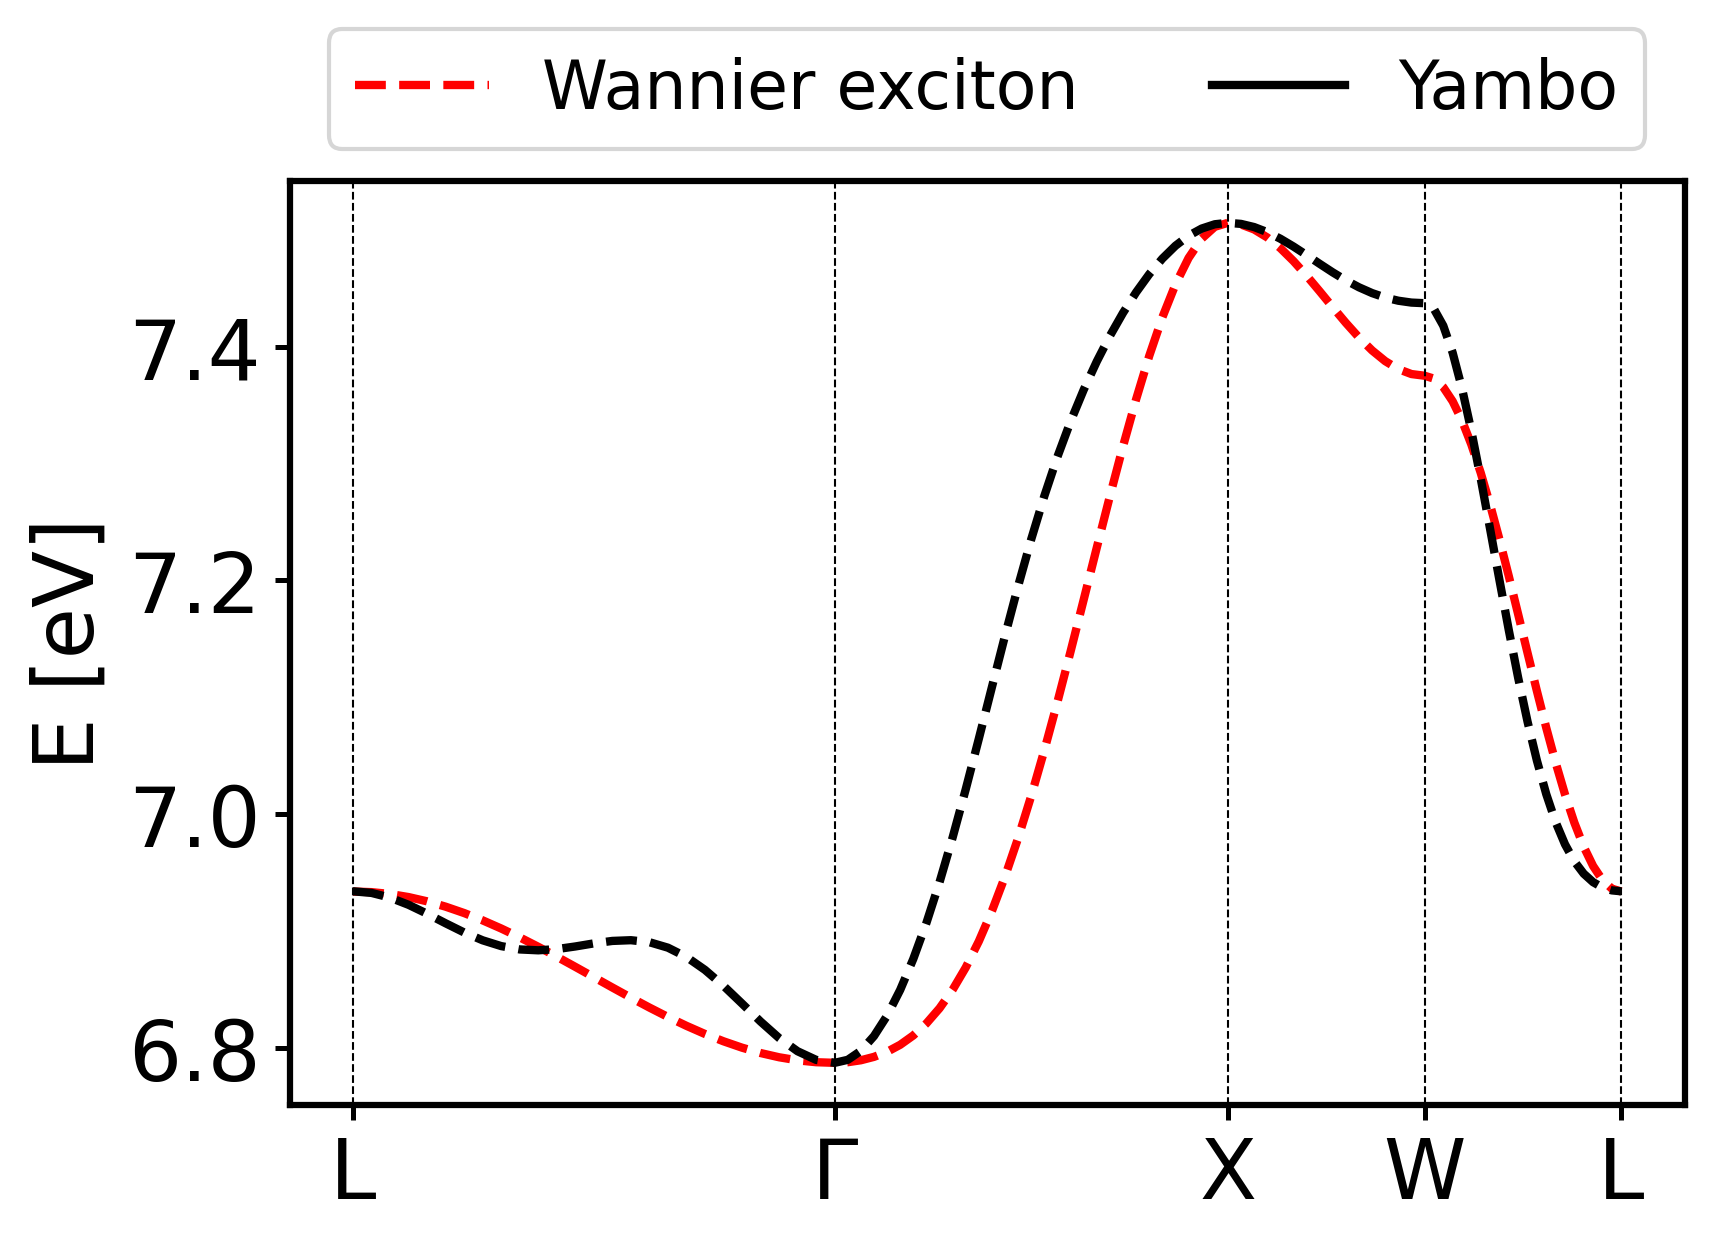

In [24]:
fig,ax = plt.subplots()
data = np.loadtxt(f'/Users/Reho0001/workQE/Projects/LiF/yambo_tutorials/May2024/Optics/4x4x4/full/1-1bands/exc_bands_triplet/o-06_BSE_triplet.excitons_interpolated',usecols=(0,1))

k_yambo = data[:,0]
exc_e = data[:,1]
for ib in range(nbands):
  ax.plot(tb_kdist, Eexc_k[:,ib], c='red', ls = '--', lw=2.0)
tb_eb = tb_ebands.add_kpath_labels(ax)
ax.plot(tb_kdist,exc_e, c='black', ls = '--', lw =2.0)
legend_entries = [
    mlines.Line2D([], [], color='red', ls ='--', label='Wannier exciton'),
    mlines.Line2D([], [], color='black', label='Yambo'),
]
ax.legend(handles=legend_entries, loc='upper center', bbox_to_anchor=(0.5, 1.20), ncol=3)
# ax.plot(qe_en, qe_bands)
ax.set_ylabel('E [eV]')
#plt.savefig('/Users/Reho0001/tmp/wann_excbadstest.png', bbox_inches='tight')

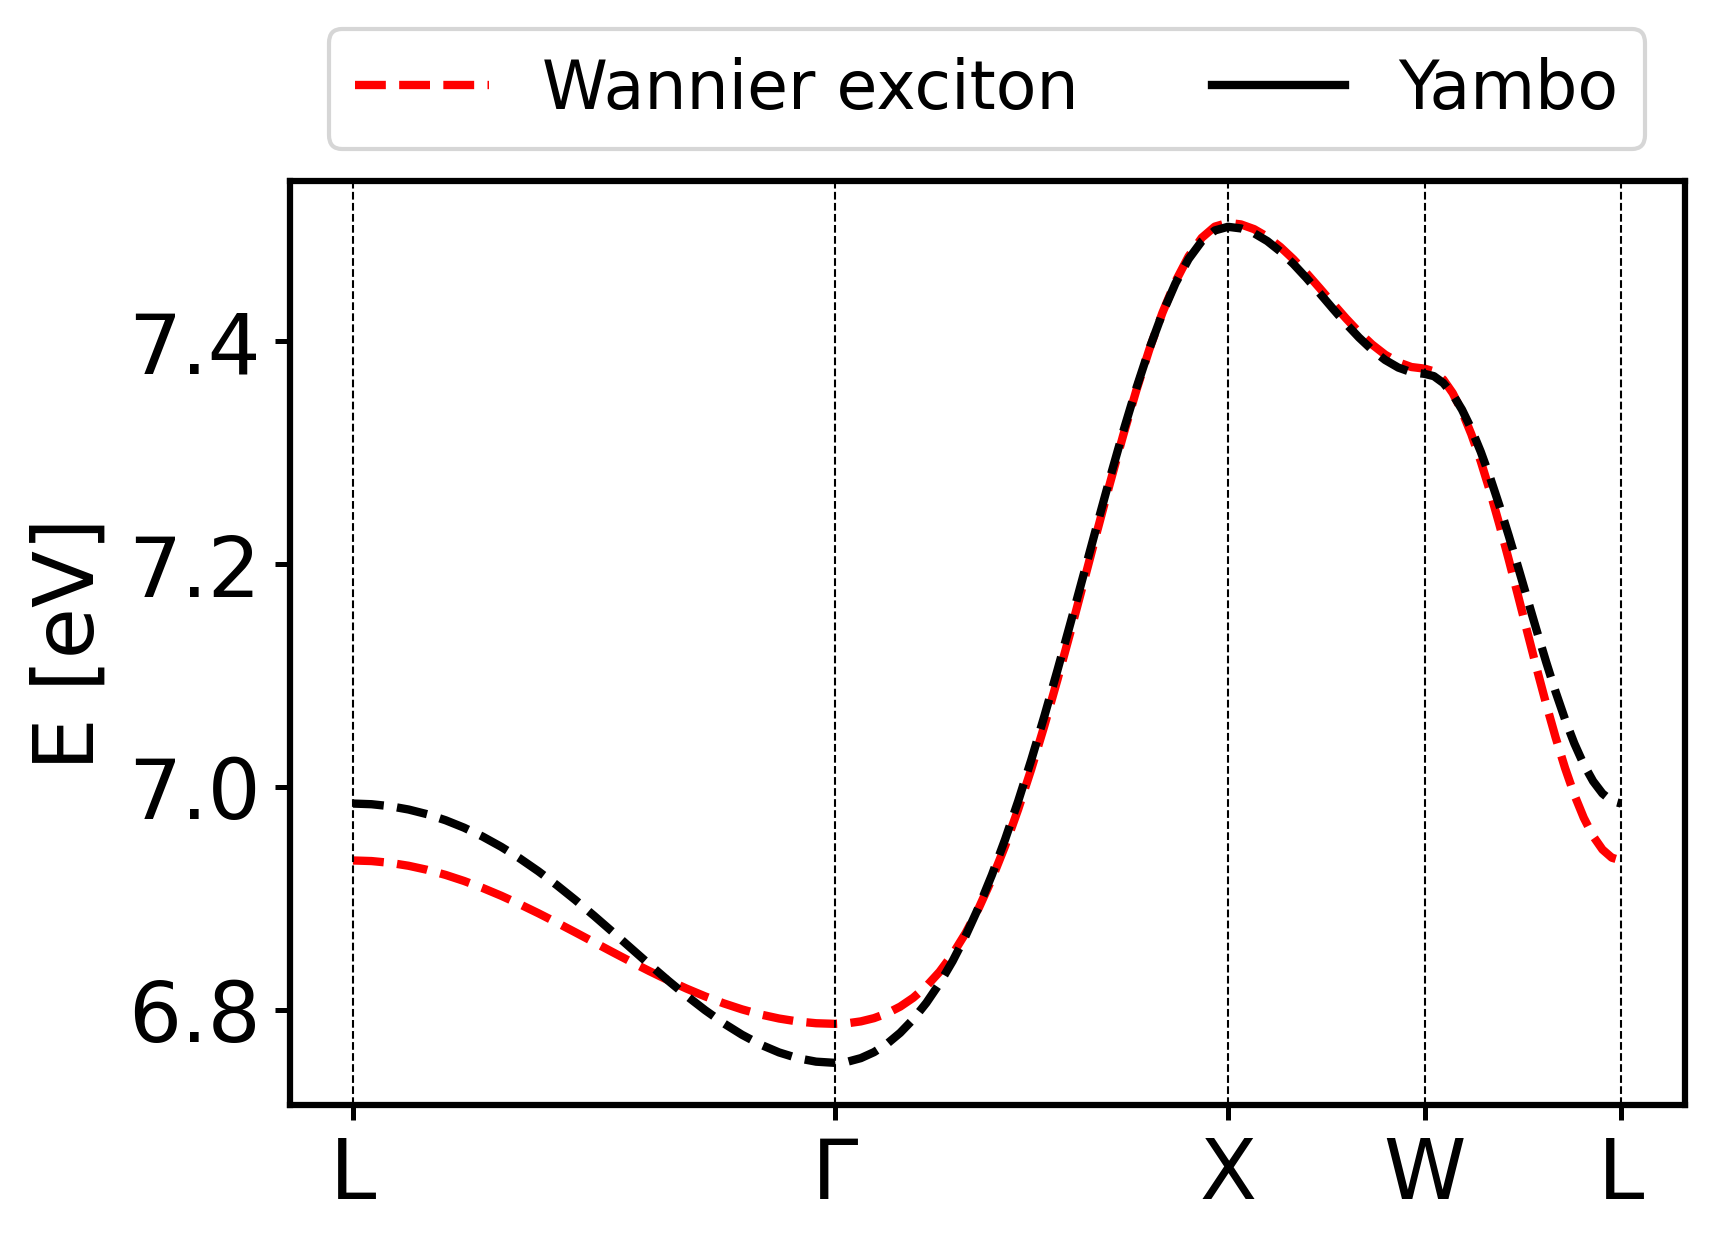

In [75]:
fig,ax = plt.subplots()
data = np.loadtxt(f'/Users/Reho0001/workQE/Projects/LiF/yambo_tutorials/May2024/Optics/2x2x2/full/exc_bands_triplet/o-06_BSE_triplet.excitons_interpolated',usecols=(0,1))

k_yambo = data[:,0]
exc_e = data[:,1]
for ib in range(nbands):
  ax.plot(tb_kdist, Eexc_k[:,ib], c='red', ls = '--', lw=2.0)
tb_eb = tb_ebands.add_kpath_labels(ax)
ax.plot(tb_kdist,exc_e-4.3, c='black', ls = '--', lw =2.0)
legend_entries = [
    mlines.Line2D([], [], color='red', ls ='--', label='Wannier exciton'),
    mlines.Line2D([], [], color='black', label='Yambo'),
]
ax.legend(handles=legend_entries, loc='upper center', bbox_to_anchor=(0.5, 1.20), ncol=3)
# ax.plot(qe_en, qe_bands)
ax.set_ylabel('E [eV]')
plt.savefig('/Users/Reho0001/tmp/wann_excbadstest.png', bbox_inches='tight')

In [51]:
len(tb_kdist)

95

## 4-2bands

In [24]:
model_exc = TBMODEL.from_wannier_files(
    hr_file=f'{YAMBO_TUT_PATH}/May2024/nscf-wannier-2x2x2/exc/LiF_exc_hr.dat',
    wsvec_file=f'{YAMBO_TUT_PATH}/May2024/nscf-wannier-2x2x2/exc/LiF_exc_wsvec.dat',
    #xyz_file=f'{WORK_PATH}/w90files/hBN_centres.xyz',
    win_file=f'{YAMBO_TUT_PATH}/May2024/nscf-wannier-2x2x2/exc/LiF_exc.win'
)
model_exc.set_mpgrid(nnkp_qgrid)

In [25]:
# Define path in reduced coordinates using Class Path
npoints = 30
path_kpoints = Path([[[  0.5,  0.500,  0.500],'L'], 
              [[  0.0,  0.0,  0.0],'$\Gamma$'],
              [[  0.5,  0.0,  0.5],'X'],
              [[  0.5,  0.250,  0.750],'W'],
              [[  0.5,  0.500,  0.500],'L']],[26,30,15,21] )
              #[[  0.750,  0.250,  0.5],'W2'],
              
kpoints_red = path_kpoints.get_klist()[:,0:3]
kpoints_car = red_car(kpoints_red, lat_k.rlat)
kdistance = path_kpoints.distances
kpoints = path_kpoints.kpoints
hrqexc=HR(f'{YAMBO_TUT_PATH}/May2024/nscf-wannier-2x2x2/exc_3/LiF_exc')
Hexc_atk = model.solve_ham_from_hr(lat_k, hrqexc , fermie = 3.0)
Eexc_k= np.array(model.get_eigenval(kpoints_red,from_hr=True))
tb_ebands = YambopyBandStructure(E_k,kpoints_red,kpath=path_kpoints)
tb_kdist = tb_ebands.distances
nbands = Eexc_k.shape[1]
nkpoints = Eexc_k.shape[0]

Time for HR.__init__() : 4.197250127792358 , read : 4.193925142288208 , headstring 0.0033249855041503906
Diagonalization took 0.005 s


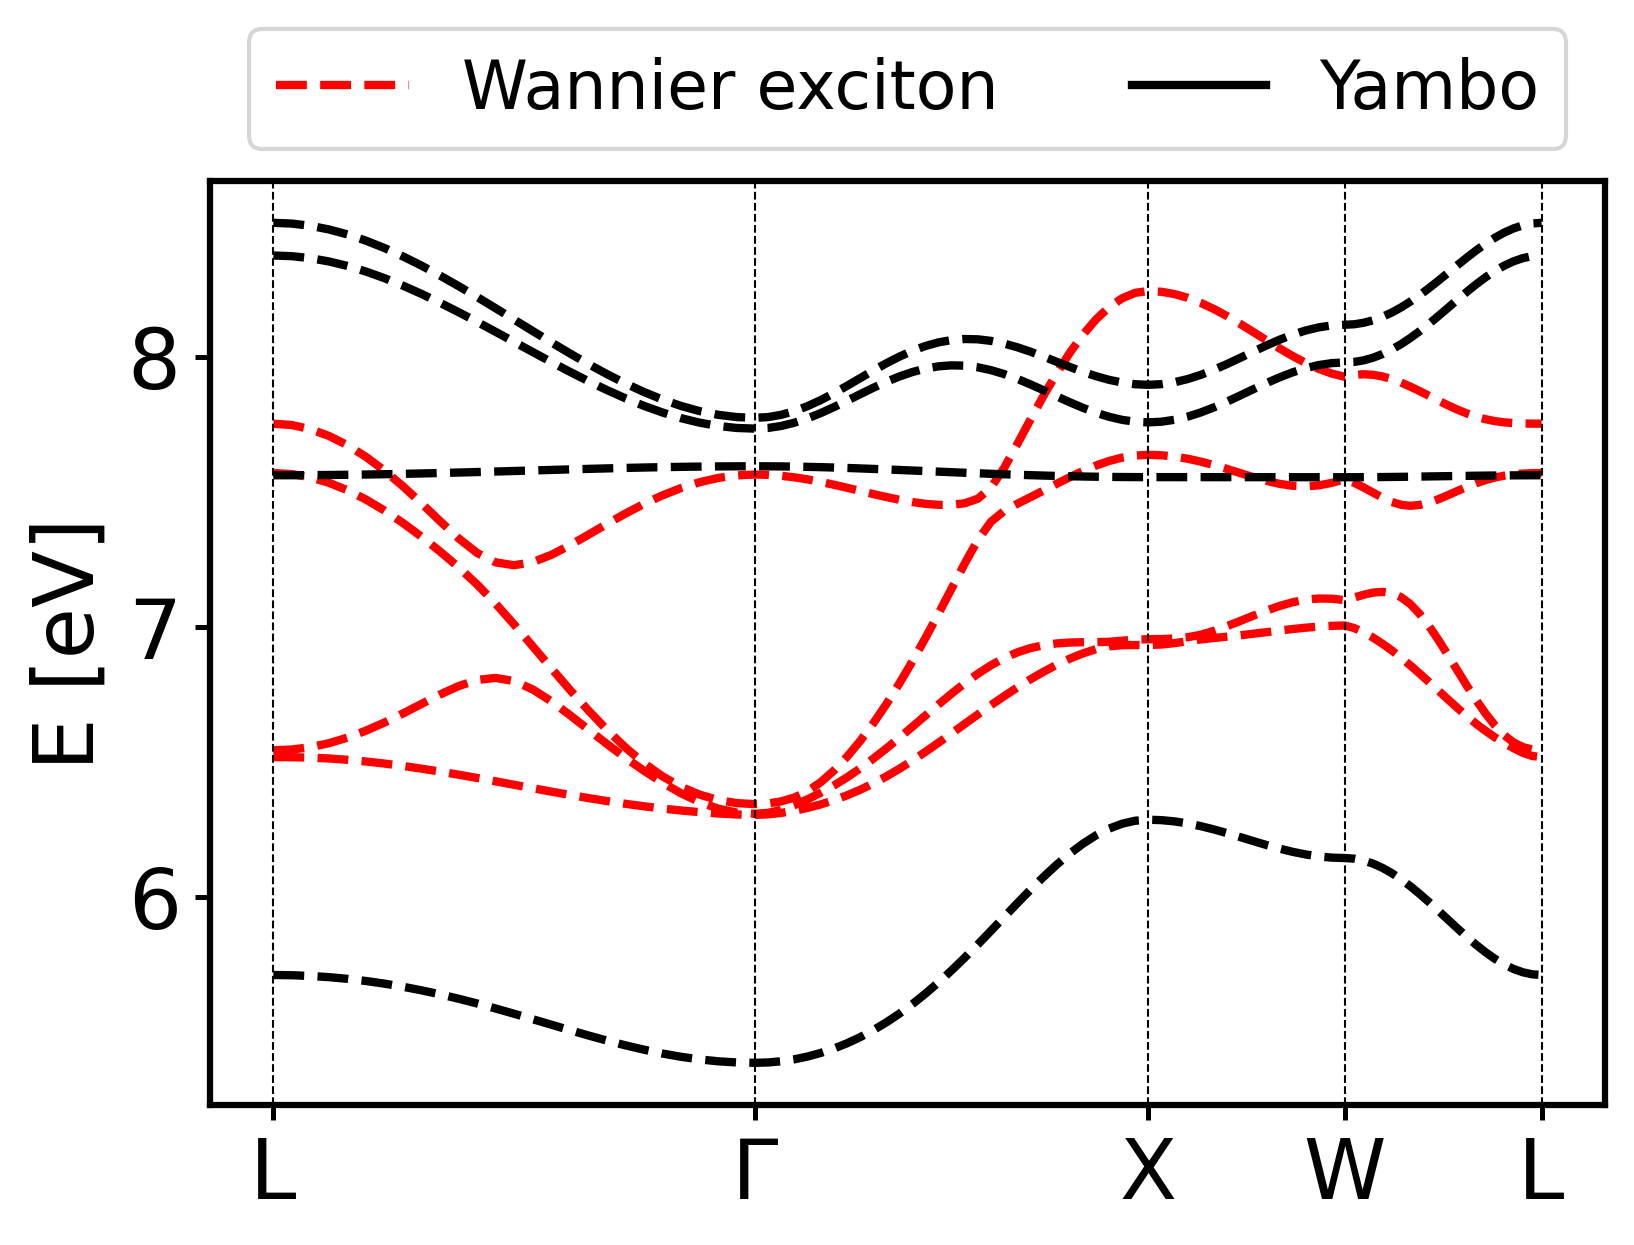

In [34]:
fig,ax = plt.subplots()
data = np.loadtxt(f'/Users/Reho0001/workQE/Projects/LiF/yambo_tutorials/May2024/Optics/2x2x2/full/exc_bands_triplet_noscissor/o-06_BSE_triplet_noscissor.excitons_interpolated',usecols=(0,1,2,3,4))

k_yambo = data[:,0]
exc_e = data[:,1:5]
for ib in range(nbands):
  ax.plot(tb_kdist, Eexc_k[:,ib], c='red', ls = '--', lw=2.0)
tb_eb = tb_ebands.add_kpath_labels(ax)
ax.plot(tb_kdist,exc_e, c='black', ls = '--', lw =2.0)
legend_entries = [
    mlines.Line2D([], [], color='red', ls ='--', label='Wannier exciton'),
    mlines.Line2D([], [], color='black', label='Yambo'),
]
ax.legend(handles=legend_entries, loc='upper center', bbox_to_anchor=(0.5, 1.20), ncol=3)
# ax.plot(qe_en, qe_bands)
ax.set_ylabel('E [eV]')
plt.savefig('/Users/Reho0001/tmp/wann_excbadstest4-2.png', bbox_inches='tight')